# Table of contents

In [ ]:
# 1. Introduction
# 2. Aimed variables
# 3. Set working directory
# 4. Imports
# 5. Global variables declaration
# 6. Data exploration
# 7. Establish the columns to work with
# 8. Small changes in the columns
# 9. Sanity test for missing data
# 10. Data visualisation
    # Price
    # Price grouped by neighbourhood
    # Boxplots of price by room type
    # Price grouped by neighbourhood and room type
    # Relationship between number of reviews and price
    # Number of rents by areas
    # Leaflet map
    # Distributions
# 11. Correlation matrix
# 12. Check for outliers
# 13. Assumptions of linear regression (Linear relationship + No or little multicollinearity)
    # Linear relationship
    # No or little multicollinearity
# 14. Data splitting 
# 15. Model
# 16. Assumptions of linear regression (Multivariate normality + No auto-correlation + Homoscedasticity)
    # Multivariate normality
    # No auto-correlation
    # Homoscedasticity
# 17. Standardized coefficients
# 18. Path analysis
# 19. Confirmatory factor analysis (CFA)
# 20. Model with structural equations 
# 21. Main conclusion

# Introduction

In [ ]:
# In the most real world cases, there are definitely exists inequality between entities. 
# Such as big companies and small companies, diligent people and not so diligent people, poors and richs, 
# high achievers and lazy people. These kind of contrasts is fascinating to see and we can deep dig into 
# their characteristics and know them better based on how they behave (as long as we got the data). 

# In this project, we focused our attention on Airbnb Seattle data set where we have listings data all over the 
# city.
# One of my objective here is to do simple comparison between rents. 
# Furthermore, in Airbnb's side they can give some recommendations to hosts and develops a new 'premium feature' 
# that can help some host to get more of their earnings or get more bookings.

# Before applying the method underlying this project (SEM), we have applied three techniques that helped us to get 
# a better understanding of the data set, namely: multiple linear regression, path analysis and 
# confirmatory factor analysis. These techniques helped us to understand the relationship between 
# aimed variables.

# Aimed variables

In [ ]:
# The following variables were extracted from the initial dataset (initial dataset had over 100 variables):

    # 'neighbourhood_group_cleansed': categorical value which will be used to identify most popular parts of Seatttle;
    # 'latitude': latitude coordinates (we will use it later to visualise the data on the map);
    # 'longitude': longitude coordinates (we will use it later to visualise the data on the map); 
    # 'property_type': categorical variable; 
    # 'room_type': categorical variable; 
    # 'bathrooms': discrete value describing property; 
    # 'bedrooms': discrete value describing property; 
    # 'beds': discrete value describing property; 
    # 'price': price of the rent ($); 
    # 'security_deposit': warrant ($); 
    # 'cleaning_fee': supplemental cost for cleaning the apartment ($); 
    # 'guests_included': number of people accepted; 
    # 'extra_people': supplemental cost for extra people ($); 
    # 'minimum_nights': discrete value; 
    # 'number_of_reviews': number of reviews; 
    # 'review_scores_rating': scores.

# We have used these variables for predicting the price of a given rent.

# Set working directory

In [1]:
setwd('D:/Master/AN_2/Sem 2/Modele cu ec. structurale/Proiect')
set.seed(42)

# Imports

In [2]:
# install.packages('lmtest', repos = 'http://cran.us.r-project.org')
# install.packages('lavaan', repos = 'http://cran.us.r-project.org')
# install.packages('semPlot', repos = 'http://cran.us.r-project.org')

In [3]:
library(tidyverse)
library(ggthemes)
library(leaflet)
library(corrplot)
library(lmtest)
library(lavaan)
library(semPlot)
library(rlang)

th <- theme_fivethirtyeight() + theme(axis.title = element_text(), axis.title.x = element_text())

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'leaflet' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following o

# Variables declaration

In [4]:
path_to_data <- 'data/data.csv'

# Data exploration

In [5]:
data <- read.csv(path_to_data, encoding = 'UTF-8', stringsAsFactors = F, na.strings = c(''))

In [6]:
dim(data)

[1] 7237  106

In [7]:
data

id       listing_url                           scrape_id    last_scraped
1      2318   https://www.airbnb.com/rooms/2318     2.020042e+13 2020-04-23  
2      6606   https://www.airbnb.com/rooms/6606     2.020042e+13 2020-04-23  
3      9419   https://www.airbnb.com/rooms/9419     2.020042e+13 2020-04-23  
4      9531   https://www.airbnb.com/rooms/9531     2.020042e+13 2020-04-23  
5      9534   https://www.airbnb.com/rooms/9534     2.020042e+13 2020-04-23  
6      9596   https://www.airbnb.com/rooms/9596     2.020042e+13 2020-04-23  
7      9909   https://www.airbnb.com/rooms/9909     2.020042e+13 2020-04-23  
8     11012   https://www.airbnb.com/rooms/11012    2.020042e+13 2020-04-23  
9     14386   https://www.airbnb.com/rooms/14386    2.020042e+13 2020-04-23  
10    15108   https://www.airbnb.com/rooms/15108    2.020042e+13 2020-04-23  
11    15749   https://www.airbnb.com/rooms/15749    2.020042e+13 2020-04-23  
12    17951   https://www.airbnb.com/rooms/17951    2.020042e+13 2020-04-23  
13    19619   https://www.airbnb.com/rooms/19619    2.020042e+13 2020-04-23  
14    20927   https://www.airbnb.com/rooms/20927    2.020042e+13 2020-04-23  
15    20928   https://www.airbnb.com/rooms/20928    2.020042e+13 2020-04-23  
16    24212   https://www.airbnb.com/rooms/24212    2.020042e+13 2020-04-23  
17    25002   https://www.airbnb.com/rooms/25002    2.020042e+13 2020-04-23  
18    26116   https://www.airbnb.com/rooms/26116    2.020042e+13 2020-04-23  
19    30712   https://www.airbnb.com/rooms/30712    2.020042e+13 2020-04-23  
20    37234   https://www.airbnb.com/rooms/37234    2.020042e+13 2020-04-23  
21    41401   https://www.airbnb.com/rooms/41401    2.020042e+13 2020-04-23  
22    43373   https://www.airbnb.com/rooms/43373    2.020042e+13 2020-04-23  
23    48848   https://www.airbnb.com/rooms/48848    2.020042e+13 2020-04-23  
24    63733   https://www.airbnb.com/rooms/63733    2.020042e+13 2020-04-23  
25    67270   https://www.airbnb.com/rooms/67270    2.020042e+13 2020-04-23  
26    68508   https://www.airbnb.com/rooms/68508    2.020042e+13 2020-04-23  
27    77149   https://www.airbnb.com/rooms/77149    2.020042e+13 2020-04-23  
28    84271   https://www.airbnb.com/rooms/84271    2.020042e+13 2020-04-23  
29    86185   https://www.airbnb.com/rooms/86185    2.020042e+13 2020-04-23  
30   107884   https://www.airbnb.com/rooms/107884   2.020042e+13 2020-04-23  
...  ...      ...                                   ...          ...         
7208 43103347 https://www.airbnb.com/rooms/43103347 2.020042e+13 2020-04-23  
7209 43104645 https://www.airbnb.com/rooms/43104645 2.020042e+13 2020-04-23  
7210 43111522 https://www.airbnb.com/rooms/43111522 2.020042e+13 2020-04-23  
7211 43118048 https://www.airbnb.com/rooms/43118048 2.020042e+13 2020-04-23  
7212 43134237 https://www.airbnb.com/rooms/43134237 2.020042e+13 2020-04-23  
7213 43135603 https://www.airbnb.com/rooms/43135603 2.020042e+13 2020-04-23  
7214 43143297 https://www.airbnb.com/rooms/43143297 2.020042e+13 2020-04-23  
7215 43143775 https://www.airbnb.com/rooms/43143775 2.020042e+13 2020-04-23  
7216 43148486 https://www.airbnb.com/rooms/43148486 2.020042e+13 2020-04-23  
7217 43163848 https://www.airbnb.com/rooms/43163848 2.020042e+13 2020-04-23  
7218 43164583 https://www.airbnb.com/rooms/43164583 2.020042e+13 2020-04-23  
7219 43178322 https://www.airbnb.com/rooms/43178322 2.020042e+13 2020-04-23  
7220 43178780 https://www.airbnb.com/rooms/43178780 2.020042e+13 2020-04-23  
7221 43180169 https://www.airbnb.com/rooms/43180169 2.020042e+13 2020-04-23  
7222 43181632 https://www.airbnb.com/rooms/43181632 2.020042e+13 2020-04-23  
7223 43184892 https://www.airbnb.com/rooms/43184892 2.020042e+13 2020-04-23  
7224 43187774 https://www.airbnb.com/rooms/43187774 2.020042e+13 2020-04-23  
7225 43187800 https://www.airbnb.com/rooms/43187800 2.020042e+13 2020-04-23  
7226 43188510 https://www.airbnb.com/rooms/43188510 2.020042e+13 2020-04-23  
7227 43188554 https://www.a

In [8]:
summary(data)

       id           listing_url          scrape_id        last_scraped      
 Min.   :    2318   Length:7237        Min.   :2.02e+13   Length:7237       
 1st Qu.:13084094   Class :character   1st Qu.:2.02e+13   Class :character  
 Median :22210669   Mode  :character   Median :2.02e+13   Mode  :character  
 Mean   :22714031                      Mean   :2.02e+13                     
 3rd Qu.:34063948                      3rd Qu.:2.02e+13                     
 Max.   :43258878                      Max.   :2.02e+13                     
                                                                            
     name             summary             space           description       
 Length:7237        Length:7237        Length:7237        Length:7237       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

# Establish the columns to work with

In [9]:
columns_to_delete <- c('id')
data[columns_to_delete] <- NULL

data <- data %>% mutate(id = row_number())

data <- data %>% 
  select('id', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating') %>%
  tidyr::drop_na()

# Small changes in the columns

In [10]:
factor_columns <- c('neighbourhood_group_cleansed', 'property_type', 'room_type')
data[factor_columns] <- map(data[factor_columns], as.factor)

data$price <- gsub('\\$', '', data$price)
data$price <- gsub('\\,', '', data$price)
data$price <- as.numeric(data$price)

data$security_deposit <- gsub('\\$', '', data$security_deposit)
data$security_deposit <- gsub('\\,', '', data$security_deposit)
data$security_deposit <- as.numeric(data$security_deposit)

data$cleaning_fee <- gsub('\\$', '', data$cleaning_fee)
data$cleaning_fee <- gsub('\\,', '', data$cleaning_fee)
data$cleaning_fee <- as.numeric(data$cleaning_fee)

data$extra_people <- gsub('\\$', '', data$extra_people)
data$extra_people <- gsub('\\,', '', data$extra_people)
data$extra_people <- as.numeric(data$extra_people)

glimpse(data)

Observations: 5,400
Variables: 17
$ id                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13...
$ neighbourhood_group_cleansed <fct> Central Area, Other neighborhoods, Oth...
$ latitude                     <dbl> 47.61082, 47.65411, 47.55017, 47.55539...
$ longitude                    <dbl> -122.2908, -122.3376, -122.3194, -122....
$ property_type                <fct> House, Guesthouse, Apartment, House, G...
$ room_type                    <fct> Entire home/apt, Entire home/apt, Priv...
$ bathrooms                    <dbl> 2.5, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0...
$ bedrooms                     <int> 4, 1, 1, 2, 2, 1, 2, 3, 3, 1, 0, 1, 1,...
$ beds                         <int> 4, 1, 1, 3, 2, 4, 2, 3, 3, 1, 1, 1, 1,...
$ price                        <dbl> 296, 90, 62, 165, 125, 120, 125, 299, ...
$ security_deposit             <dbl> 500, 200, 100, 300, 400, 200, 300, 350...
$ cleaning_fee                 <dbl> 250, 40, 20, 120, 95, 85, 150, 165, 10...
$ guests_included 

# Sanity test for missing data 

In [11]:
percentage_of_missing_data_per_column <- data %>% summarise_all(~(sum(is.na(.))/n()))

percentage_of_missing_data_per_column <- gather(percentage_of_missing_data_per_column, key = 'column', value = 'percent_missing')
percentage_of_missing_data_per_column <- percentage_of_missing_data_per_column[percentage_of_missing_data_per_column$percent_missing > 0.0, ] 
percentage_of_missing_data_per_column['percent_missing'] <- percentage_of_missing_data_per_column['percent_missing'] * 100
percentage_of_missing_data_per_column

column percent_missing

# Data visualisation

Price

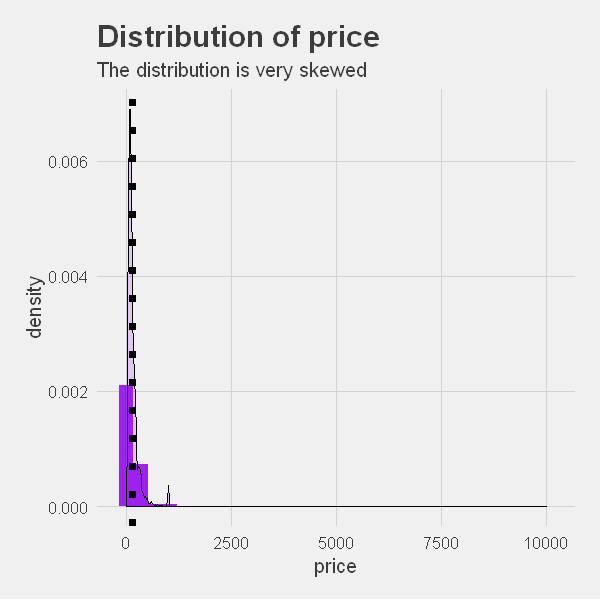

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(price)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of price',
          subtitle = 'The distribution is very skewed') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$price), 2), size = 2, linetype = 3)

Warning message in mean.default(data):
"argument is not numeric or logical: returning NA"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing missing values (geom_vline)."

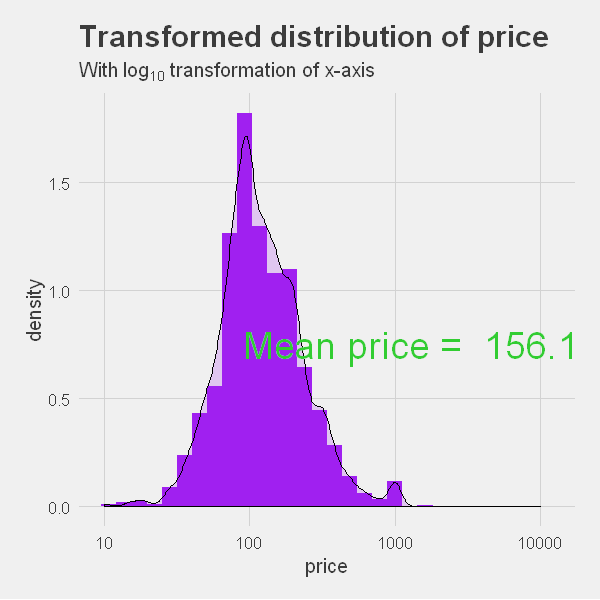

In [13]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(price)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Transformed distribution of price',
          subtitle = expression('With' ~ 'log'[10] ~ 'transformation of x-axis')) +
  geom_vline(xintercept = round(mean(data), 2), size = 2, linetype = 3) +
  scale_x_log10() +
  annotate('text', x = 1800, y = 0.75,label = paste('Mean price = ', paste0(round(mean(data$price), 2), "$")),
           color =  '#32CD32', size = 8)

Price grouped by neighbourhood

In [14]:
price_by_nh <- data %>%
  group_by(neighbourhood_group_cleansed) %>%
  summarise(price = round(mean(price), 2))

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

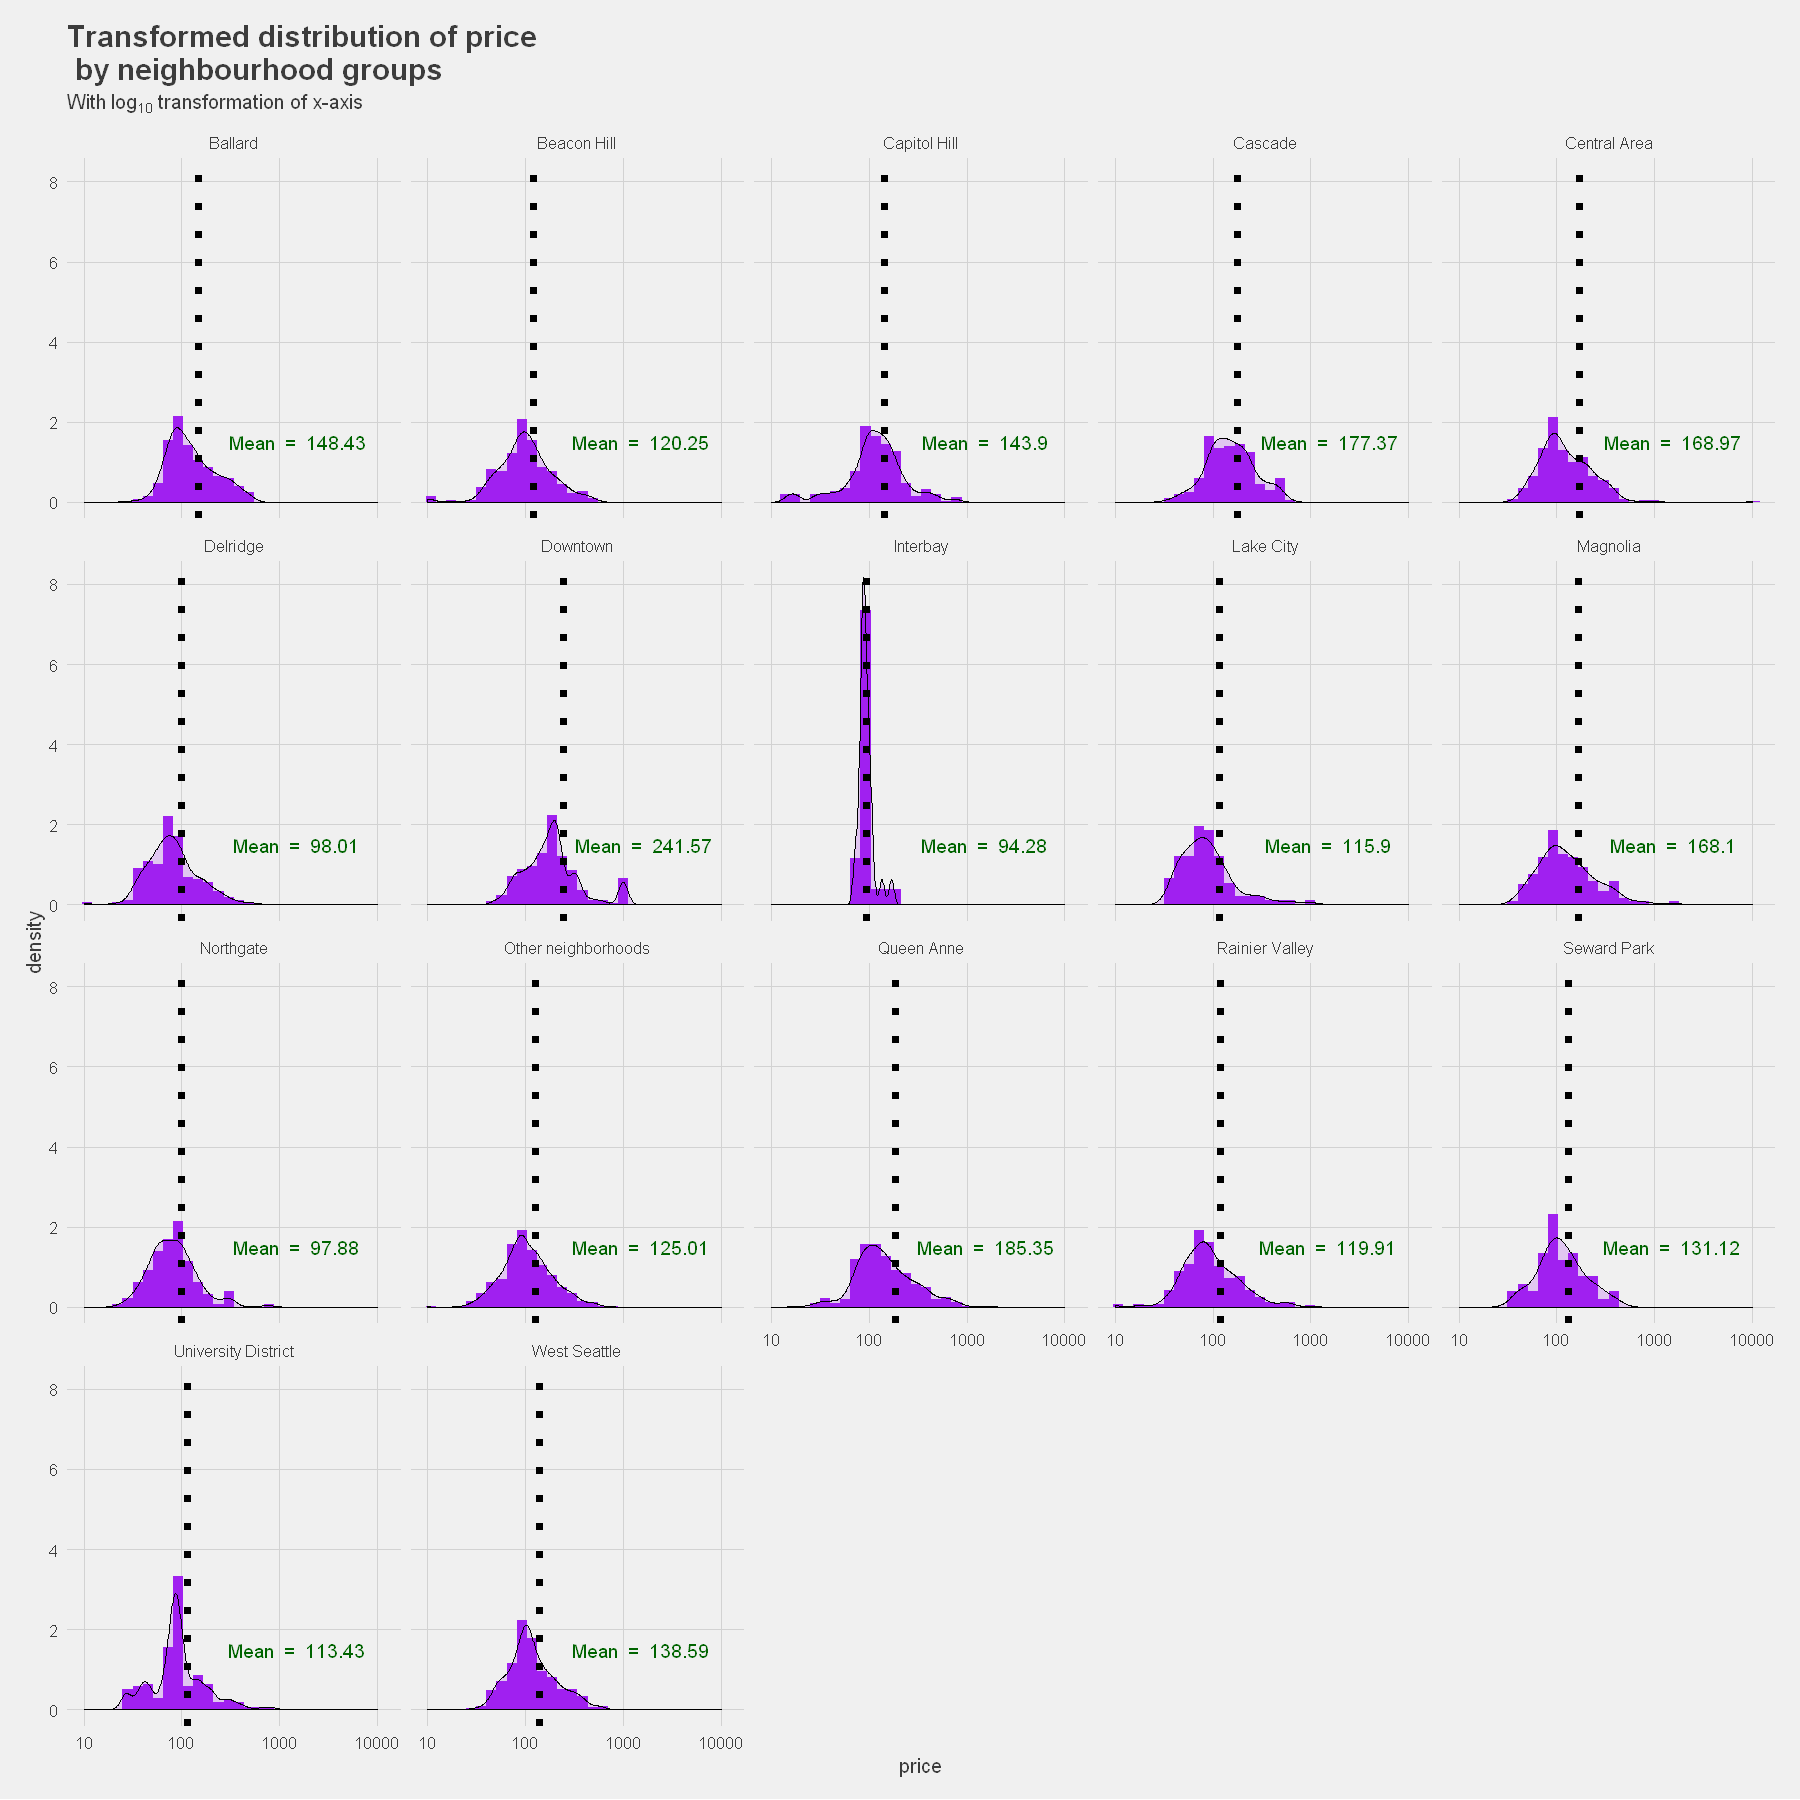

In [15]:
options(repr.plot.width = 15, repr.plot.height = 15)

ggplot(data, aes(price)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Transformed distribution of price\n by neighbourhood groups',
          subtitle = expression('With' ~ 'log'[10] ~ 'transformation of x-axis')) +
  geom_vline(data = price_by_nh, aes(xintercept = price), size = 2, linetype = 3) +
  geom_text(data = price_by_nh, y = 1.5, aes(x = price + 1400, label = paste('Mean  = ', price)), color = 'darkgreen', size = 4) +
  facet_wrap(~neighbourhood_group_cleansed) +
  scale_x_log10() 

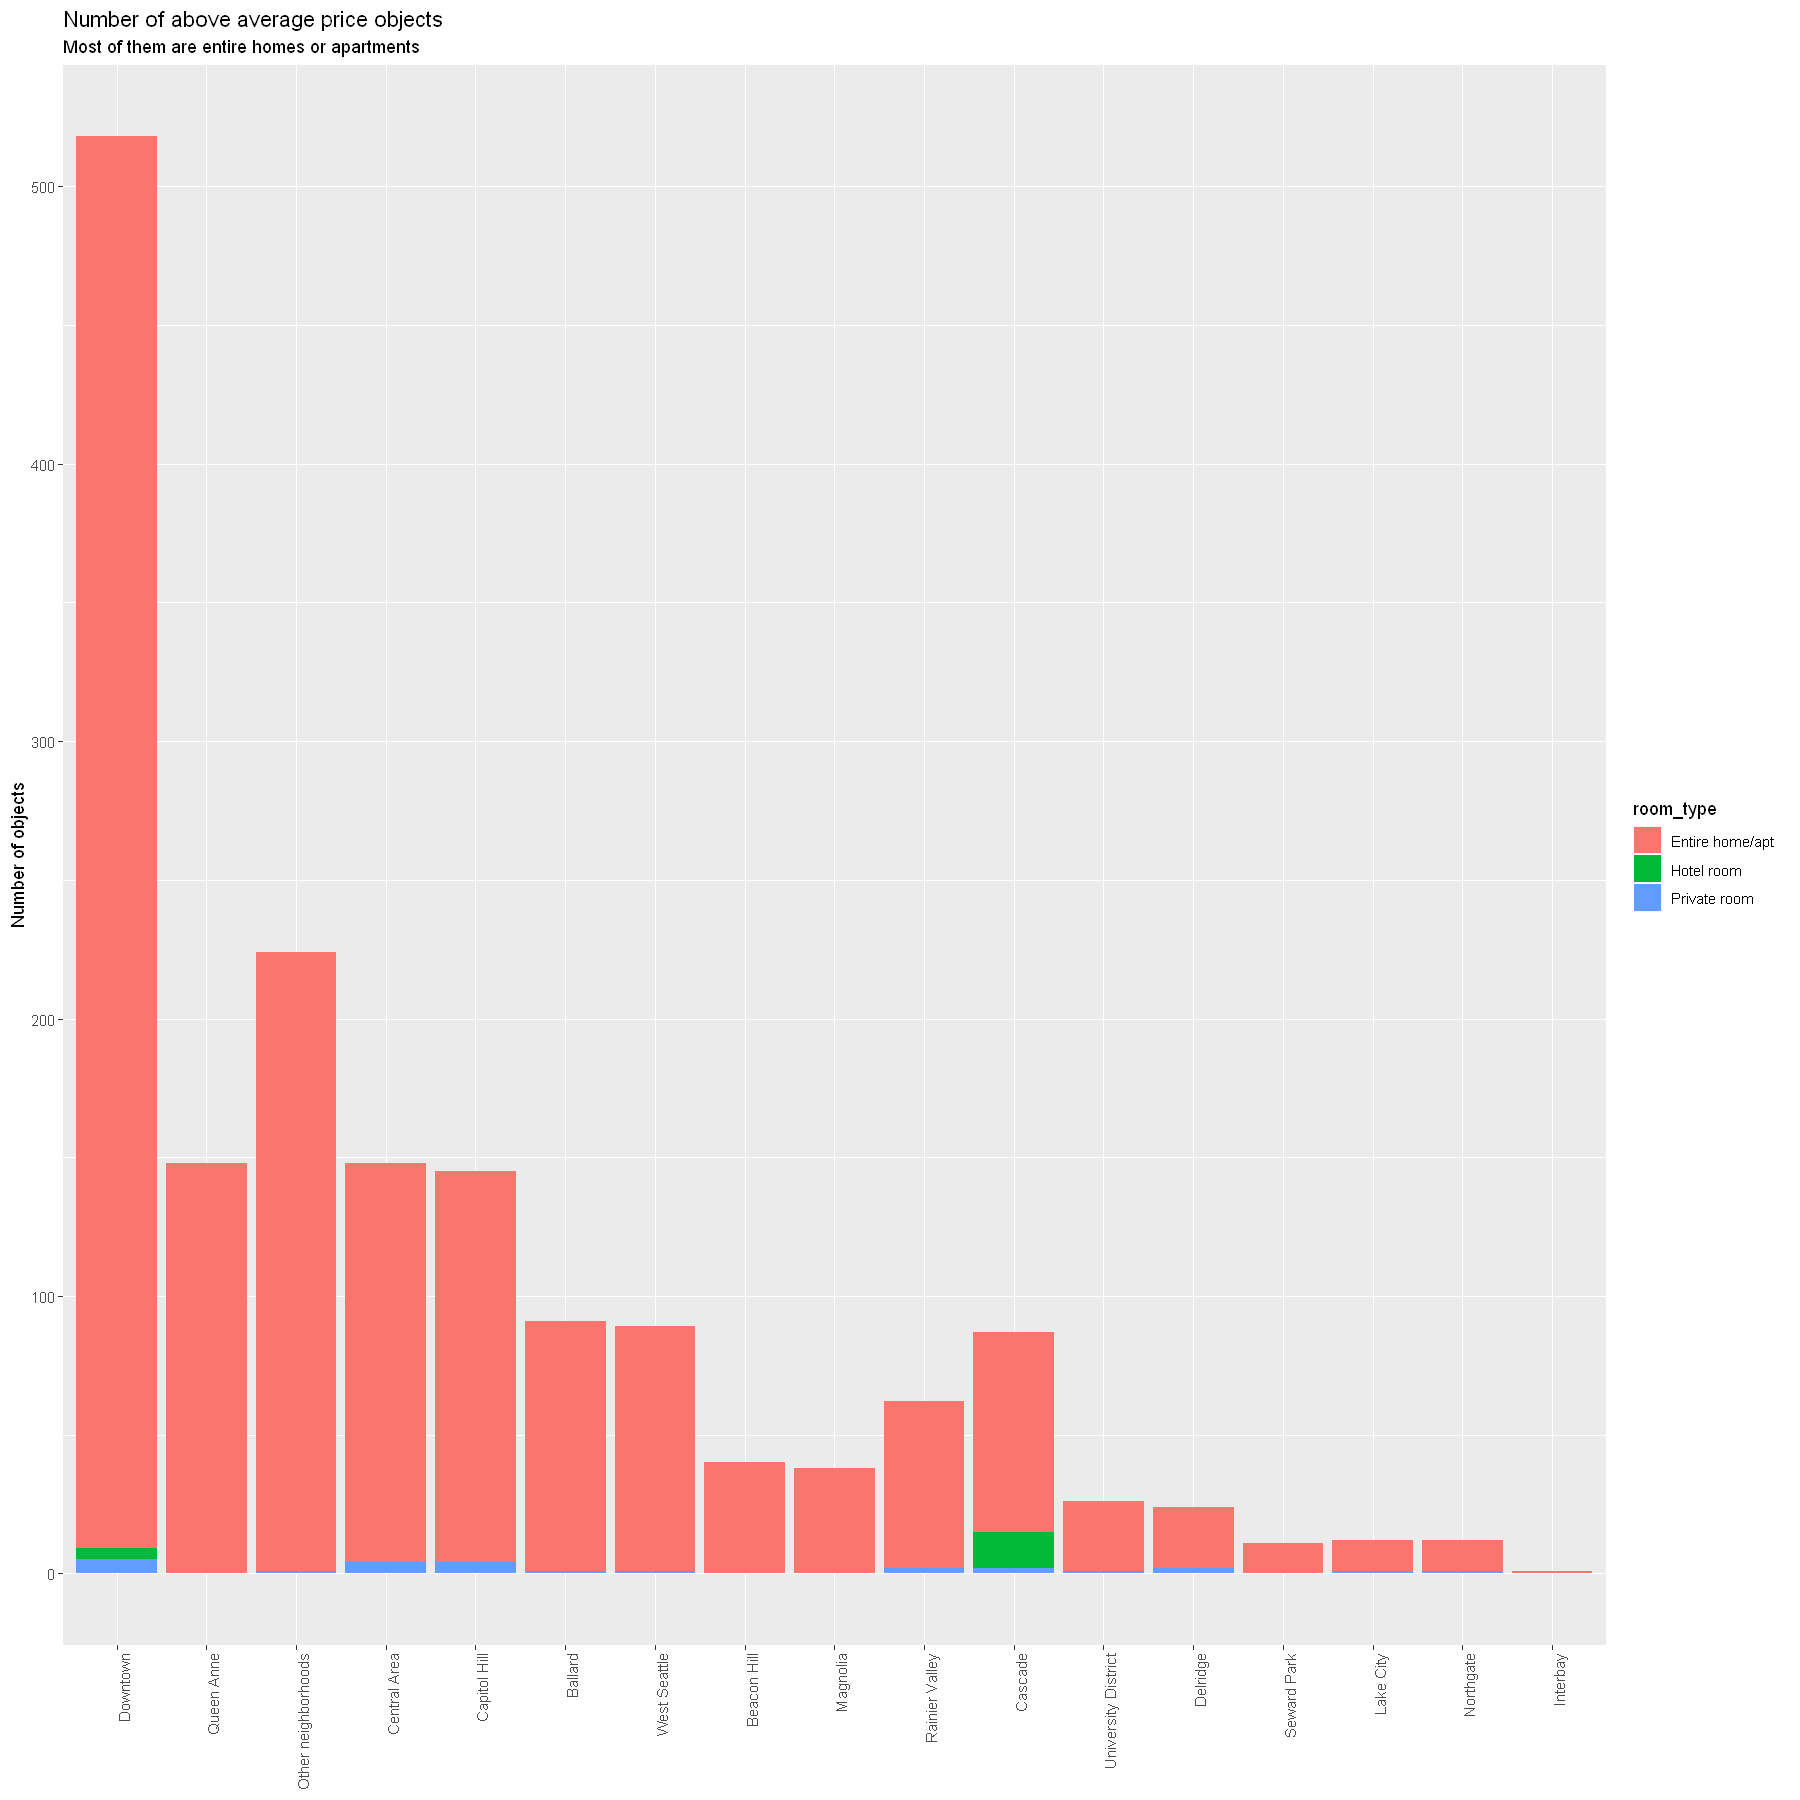

In [16]:
data %>% 
  filter(price >= mean(price)) %>% 
  group_by(neighbourhood_group_cleansed, room_type) %>% 
  tally %>% 
  ggplot(aes(reorder(neighbourhood_group_cleansed, desc(n)), n, fill = room_type)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  xlab(NULL) +
  ylab('Number of objects') +
  ggtitle('Number of above average price objects', subtitle = 'Most of them are entire homes or apartments') +
  geom_bar(stat = 'identity')

Boxplots of price by room type

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

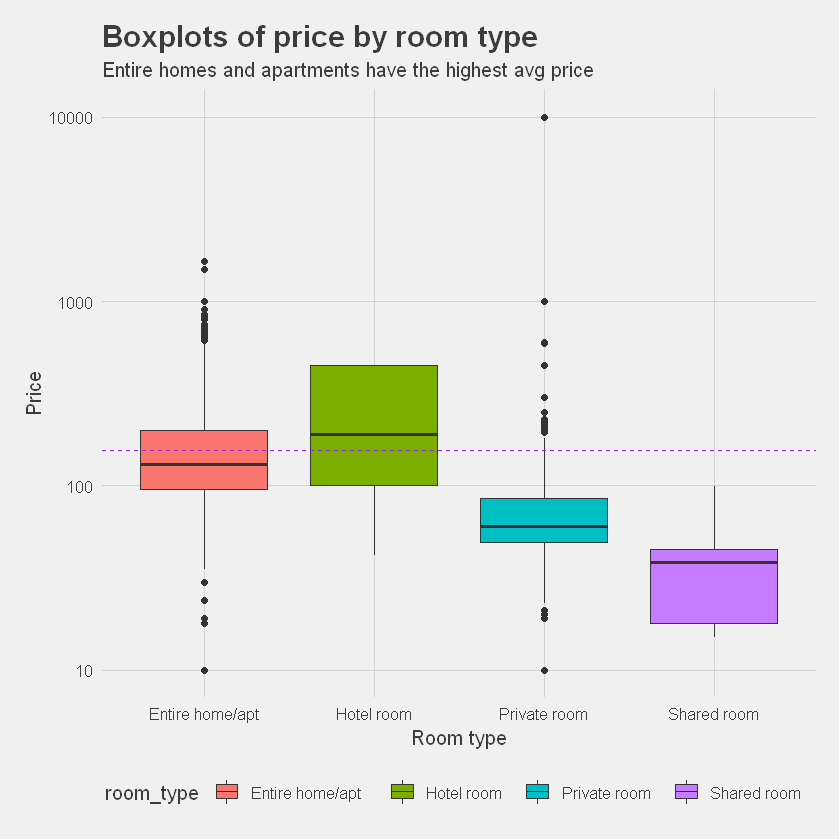

In [17]:
options(repr.plot.width = 7, repr.plot.height = 7)

ggplot(data, aes(x = room_type, y = price)) +
  geom_boxplot(aes(fill = room_type)) + scale_y_log10() +
  th + 
  xlab('Room type') + 
  ylab('Price') +
  ggtitle('Boxplots of price by room type', subtitle = 'Entire homes and apartments have the highest avg price') +
  geom_hline(yintercept = mean(data$price), color = 'purple', linetype = 2)

Price grouped by neighbourhood and room type 

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

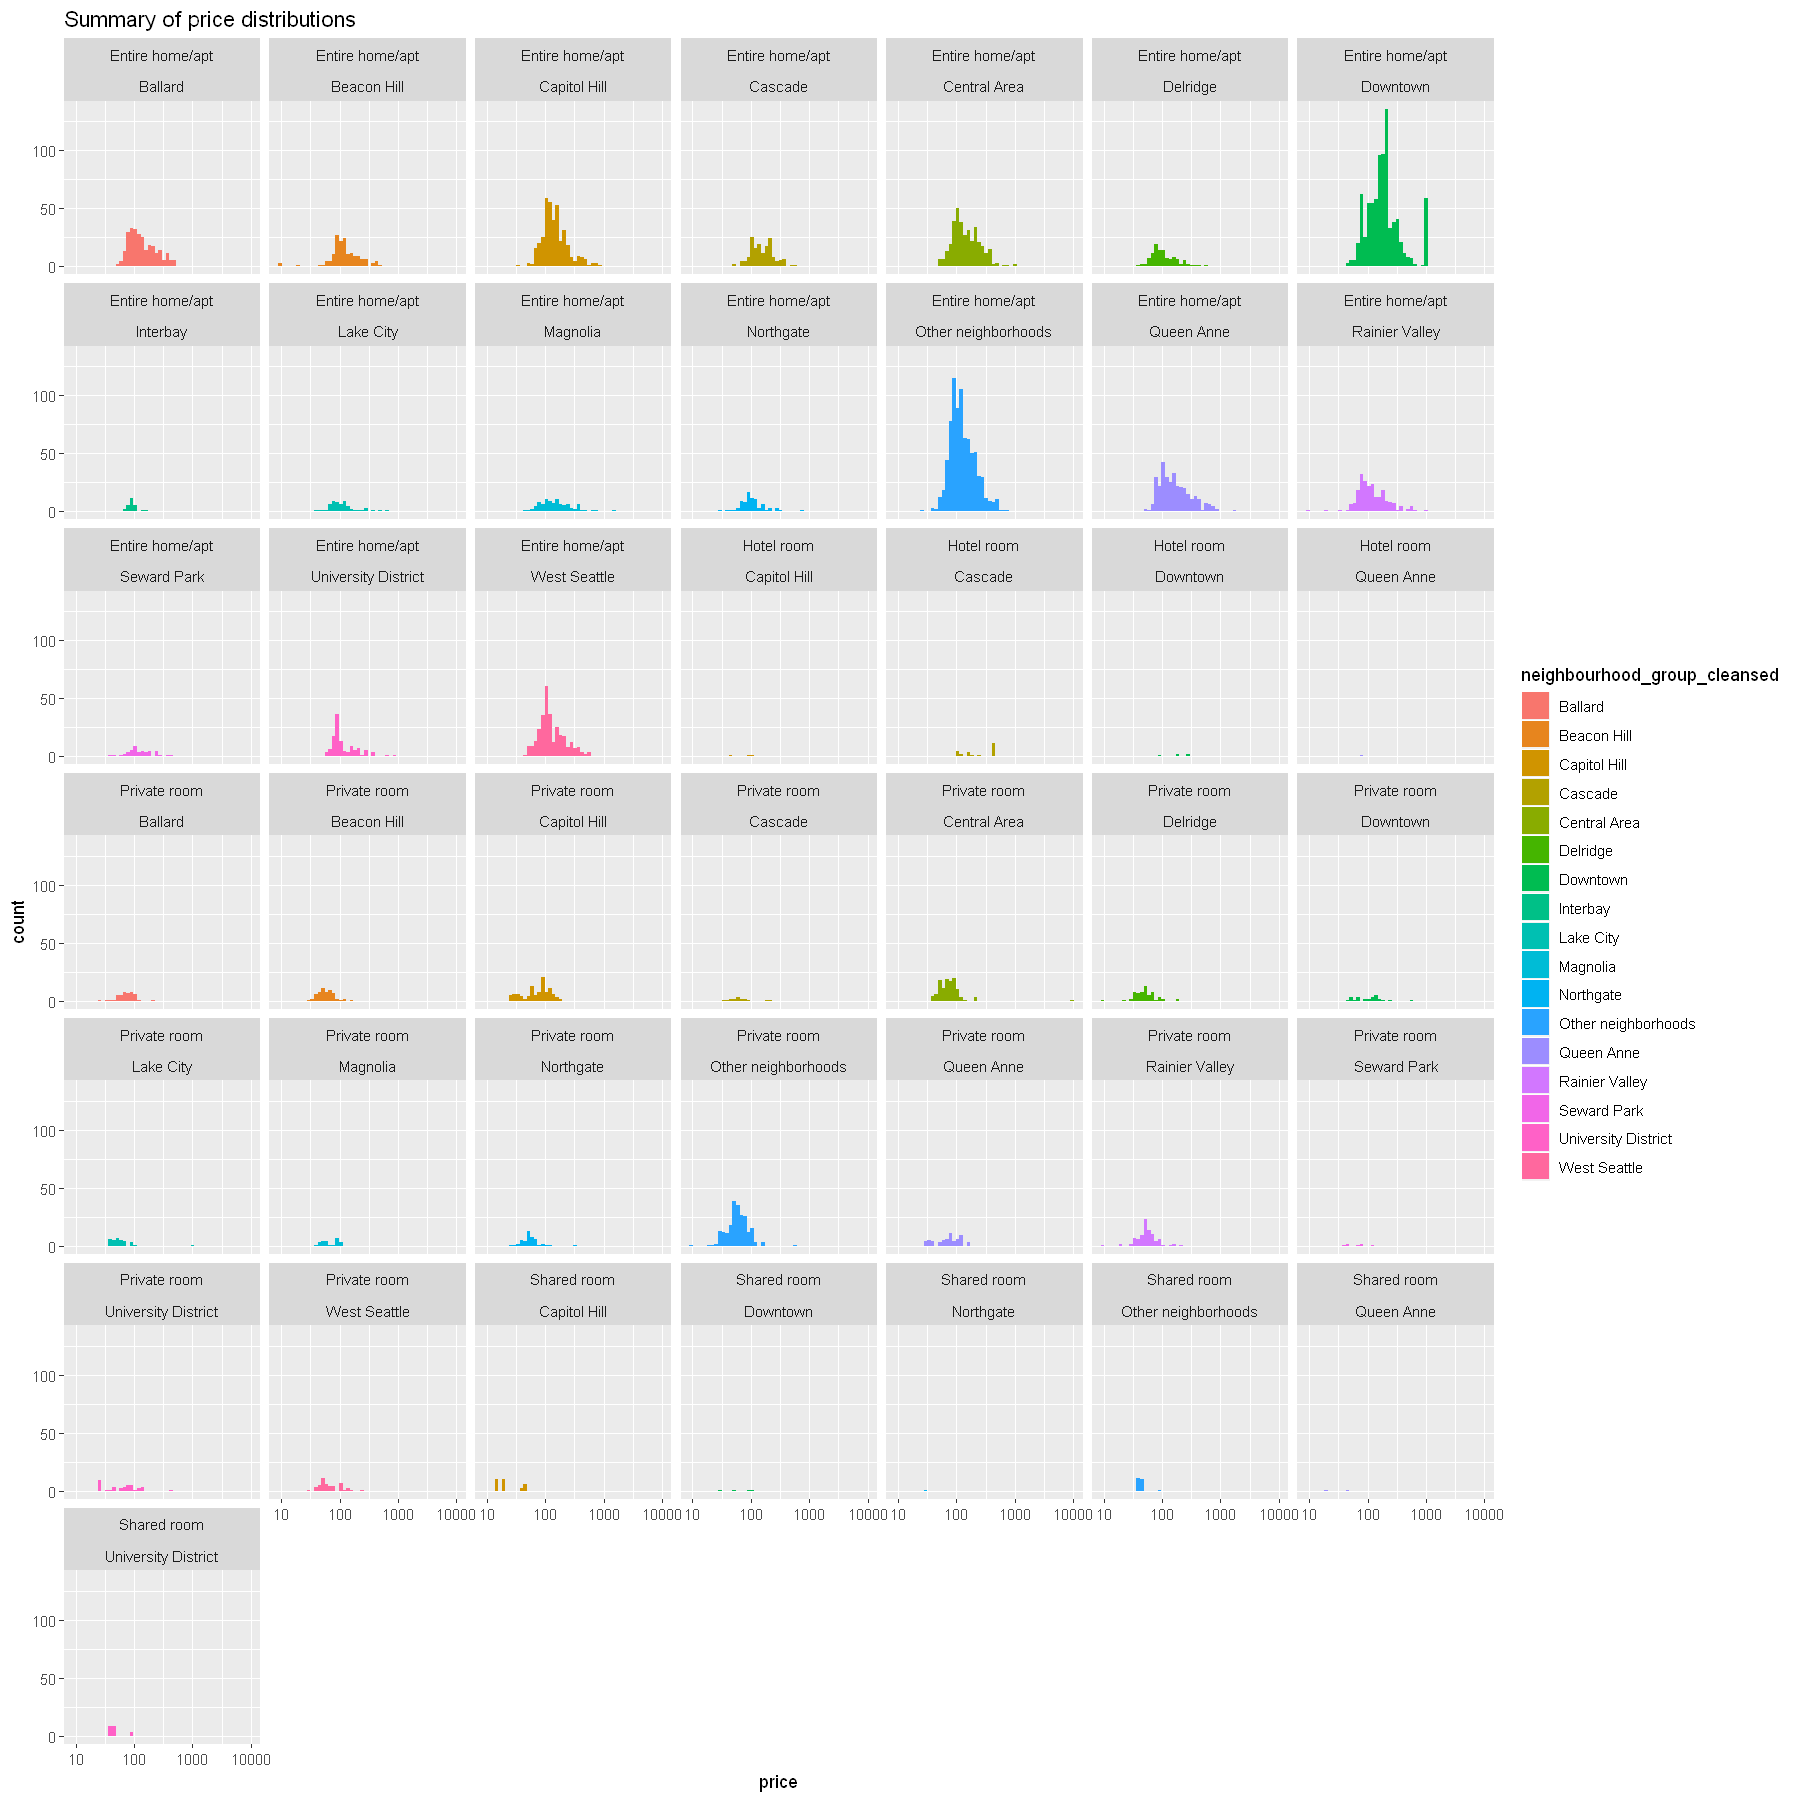

In [18]:
options(repr.plot.width = 15, repr.plot.height = 15)

data %>% 
  arrange(desc(price)) %>%
  ggplot(aes(x = price, fill = neighbourhood_group_cleansed)) +
  geom_histogram(bins = 50) +
  scale_x_log10() + 
  ggtitle('Summary of price distributions') +
  facet_wrap(~room_type + neighbourhood_group_cleansed)

Relationship between number of reviews and price

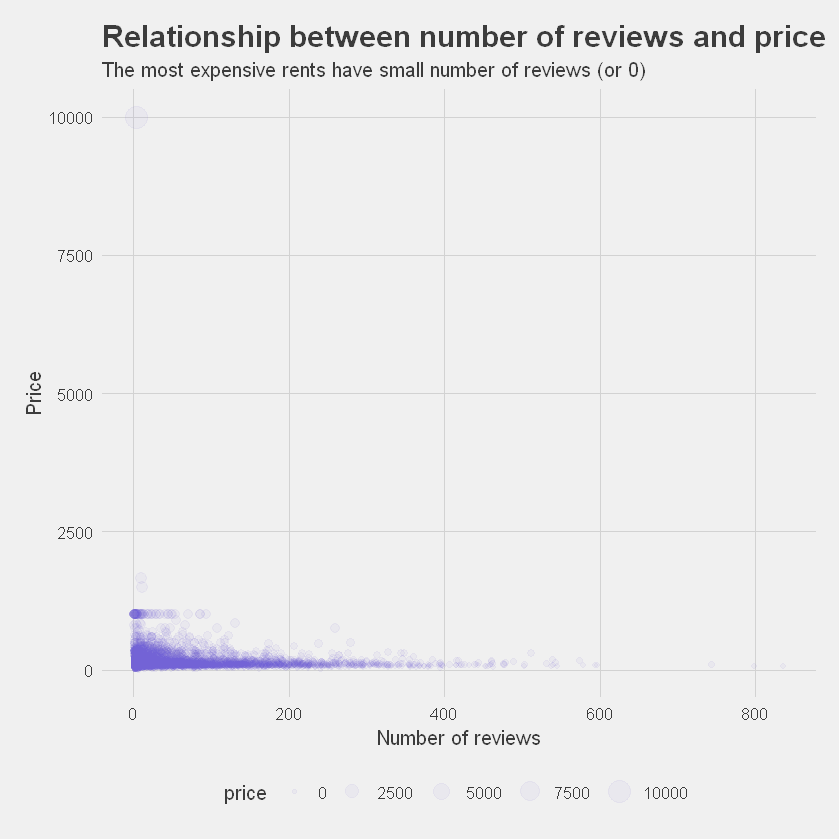

In [19]:
options(repr.plot.width = 7, repr.plot.height = 7)

ggplot(data, aes(number_of_reviews, price)) +
  th + 
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_point(aes(size = price), alpha = 0.05, color = 'slateblue') +
  xlab('Number of reviews') +
  ylab('Price') +
  ggtitle('Relationship between number of reviews and price', subtitle = 'The most expensive rents have small number of reviews (or 0)')

Number of rents by areas 

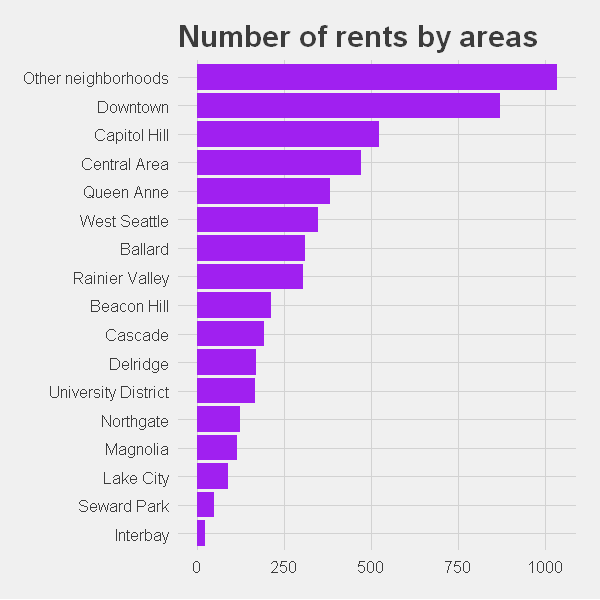

In [20]:
options(repr.plot.width = 5, repr.plot.height = 5)

data %>% group_by(neighbourhood_group_cleansed) %>% 
  tally() %>% 
  ggplot(aes(x = reorder(neighbourhood_group_cleansed, n), n)) +
  geom_bar(stat = 'identity', fill = 'purple') +
  theme_fivethirtyeight() +
  ggtitle('Number of rents by areas') +
  coord_flip() +
  scale_color_manual(values=c('white', 'black'), guide = F)

Leaflet map

In [62]:
options(repr.plot.width = 20, repr.plot.height = 20)

pal <- colorFactor(palette = c('red', 'green', 'blue', 'purple', 'yellow'), 
                   domain = data$neighbourhood_group_cleansed)

leaflet(data = data) %>% 
  addProviderTiles(providers$CartoDB.DarkMatterNoLabels) %>%  
  addCircleMarkers(~longitude, ~latitude, color = ~pal(neighbourhood_group_cleansed), 
                   weight = 1, radius = 1, fillOpacity = 0.1, opacity = 0.1, 
                   label = paste('Name:', data$name)) %>% 
  addLegend('bottomright', pal = pal, values = ~neighbourhood_group_cleansed,
            title = 'Neighbourhood groups',
            opacity = 1
  )

HTML widgets cannot be represented in plain text (need html)

Distributions

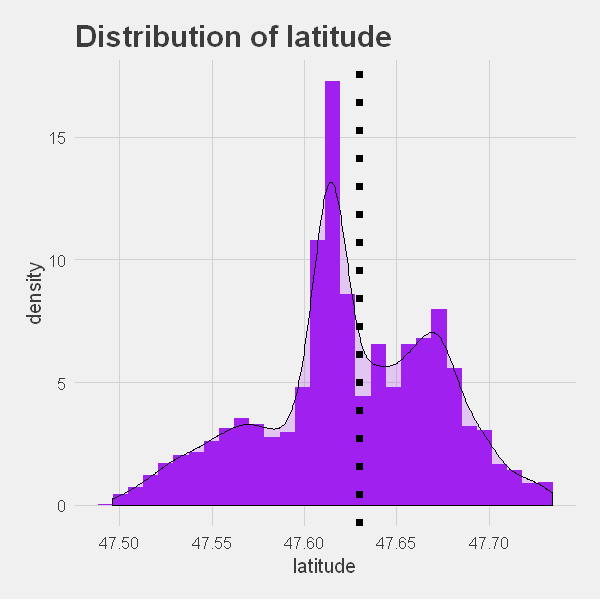

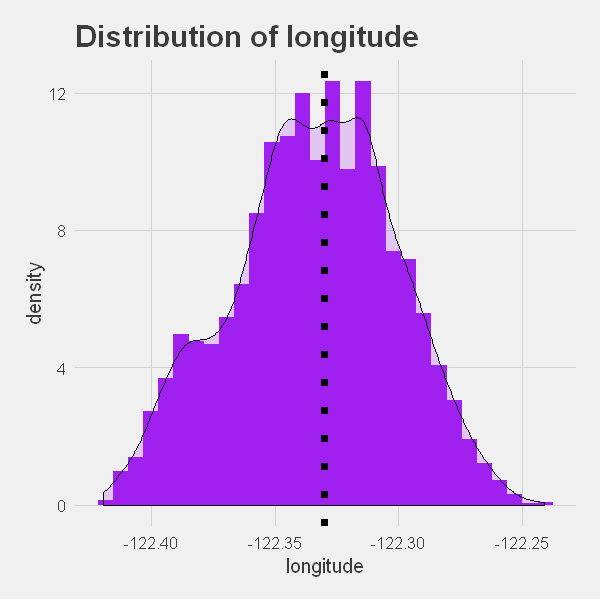

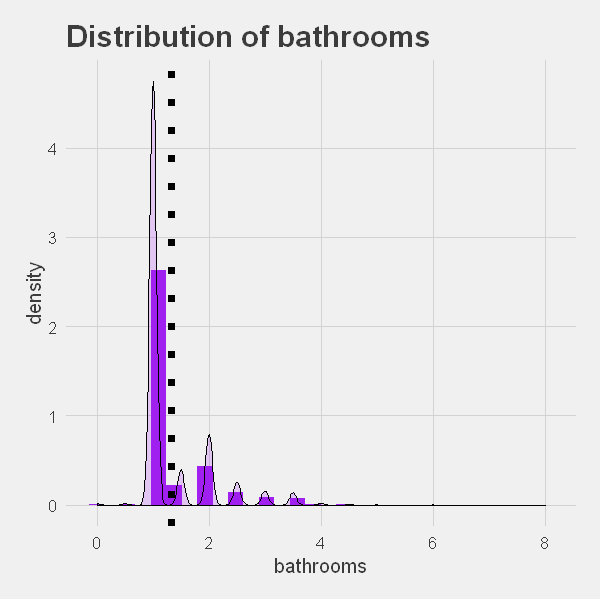

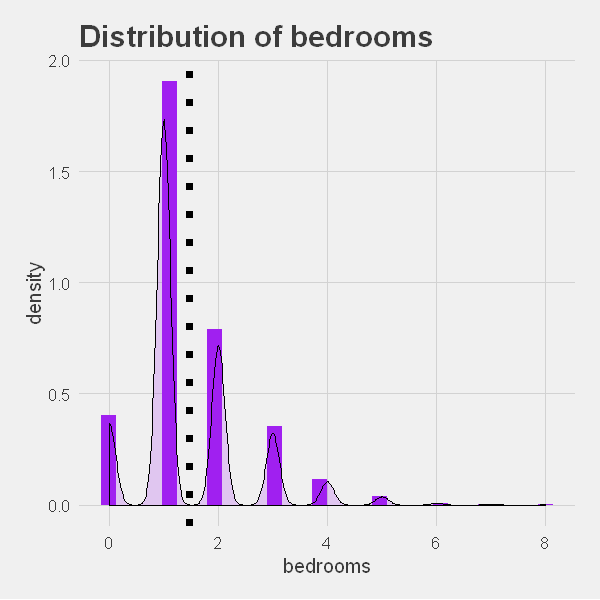

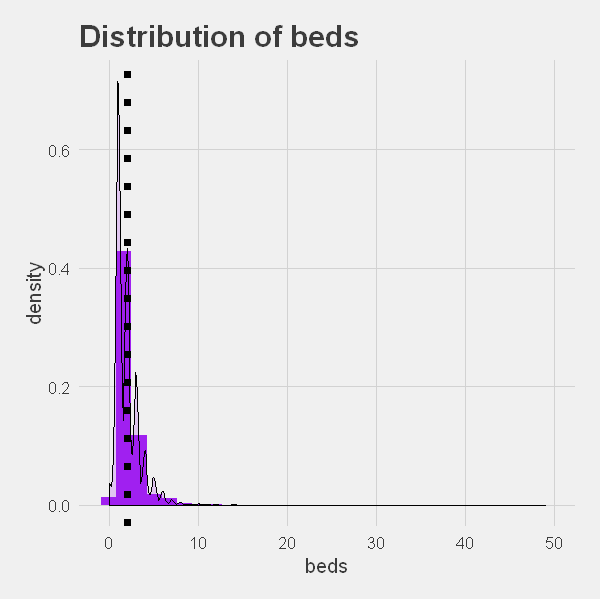

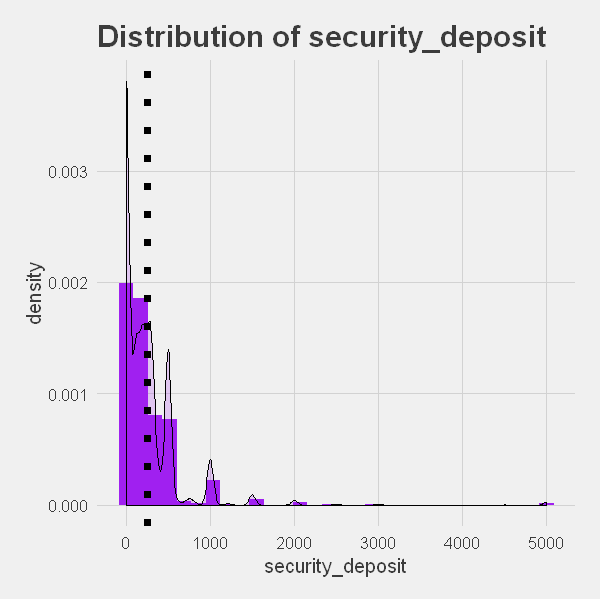

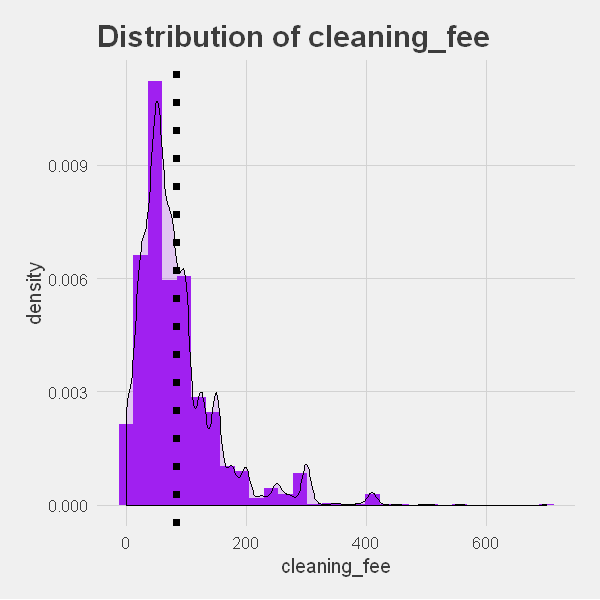

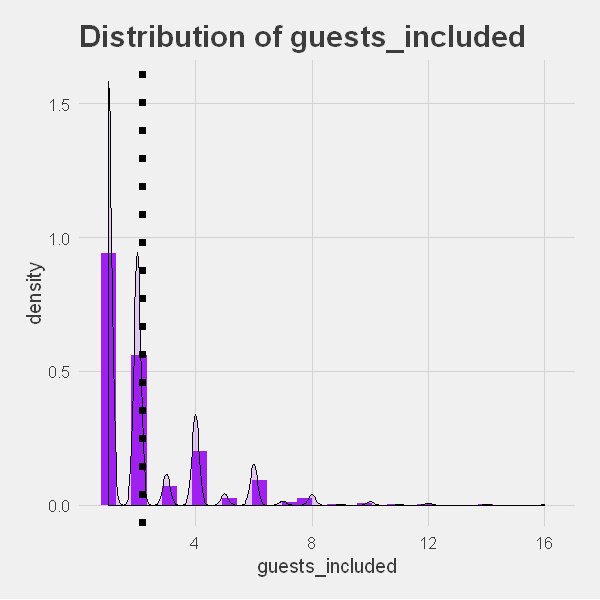

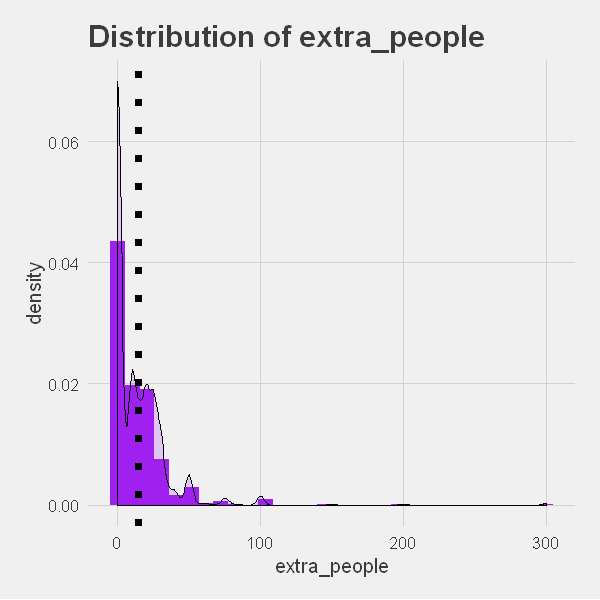

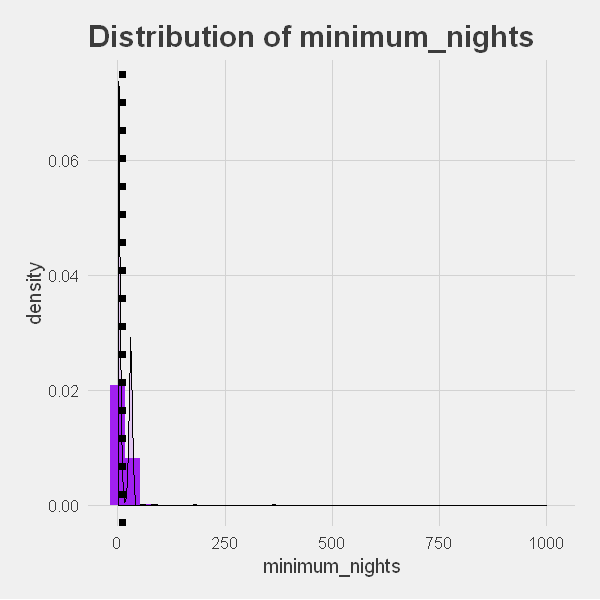

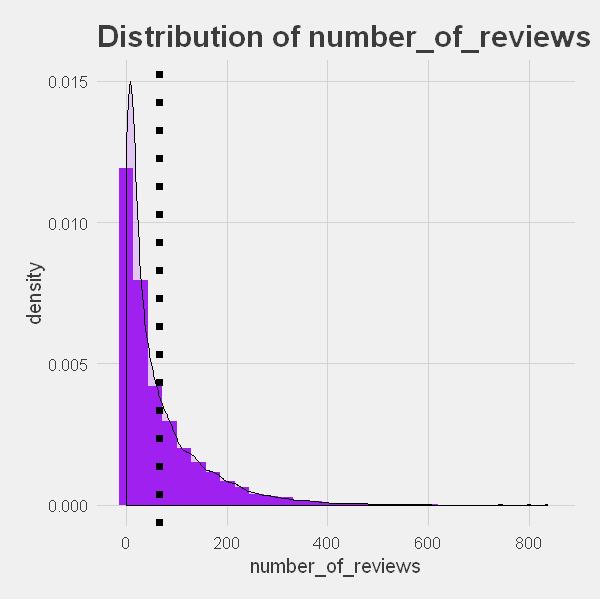

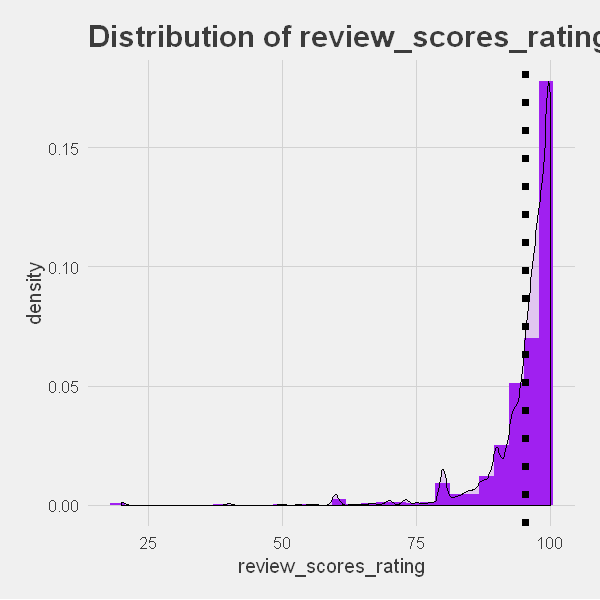

In [22]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(latitude)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of latitude') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$latitude), 2), size = 2, linetype = 3)

ggplot(data, aes(longitude)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of longitude') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$longitude), 2), size = 2, linetype = 3)

ggplot(data, aes(bathrooms)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of bathrooms') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$bathrooms), 2), size = 2, linetype = 3)

ggplot(data, aes(bedrooms)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of bedrooms') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$bedrooms), 2), size = 2, linetype = 3)

ggplot(data, aes(beds)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of beds') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$beds), 2), size = 2, linetype = 3)

ggplot(data, aes(security_deposit)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of security_deposit') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$security_deposit), 2), size = 2, linetype = 3)

ggplot(data, aes(cleaning_fee)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of cleaning_fee') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$cleaning_fee), 2), size = 2, linetype = 3)

ggplot(data, aes(guests_included)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of guests_included') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$guests_included), 2), size = 2, linetype = 3)

ggplot(data, aes(extra_people)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of extra_people') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$extra_people), 2), size = 2, linetype = 3)

ggplot(data, aes(minimum_nights)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of minimum_nights') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$minimum_nights), 2), size = 2, linetype = 3)

ggplot(data, aes(number_of_reviews)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of number_of_reviews') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$number_of_reviews), 2), size = 2, linetype = 3)

ggplot(data, aes(review_scores_rating)) +
  geom_histogram(bins = 30, aes(y = ..density..), fill = 'purple') + 
  geom_density(alpha = 0.2, fill = 'purple') +
  th +
  ggtitle('Distribution of review_scores_rating') +
  theme(axis.title = element_text(), axis.title.x = element_text()) +
  geom_vline(xintercept = round(mean(data$review_scores_rating), 2), size = 2, linetype = 3)

# Correlation matrix

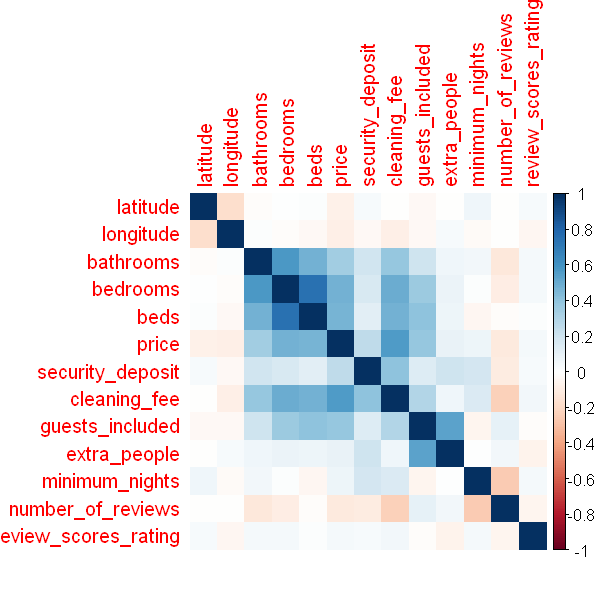

In [23]:
options(repr.plot.width = 5, repr.plot.height = 5)

data_cor <- data[, c('latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating')]
data_cor <- data_cor[complete.cases(data_cor), ]
correlation_matrix <- cor(data_cor, method = 'spearman')
corrplot(correlation_matrix, method = 'color')

In [24]:
data <- data %>%
    select(-extra_people, -minimum_nights)

# Check for outliers

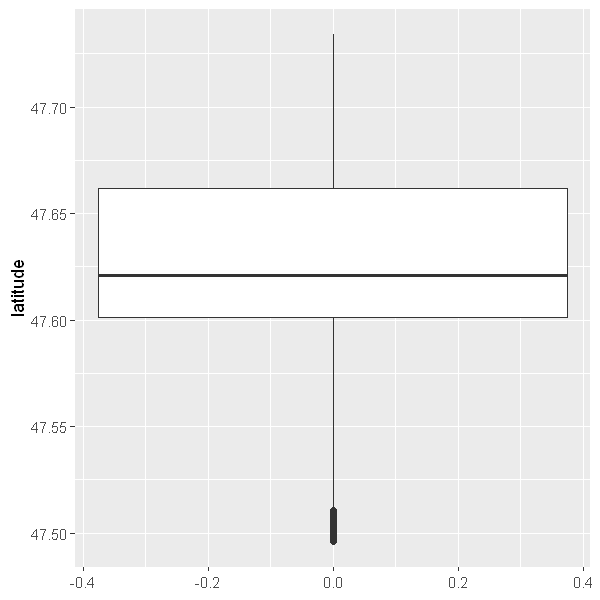

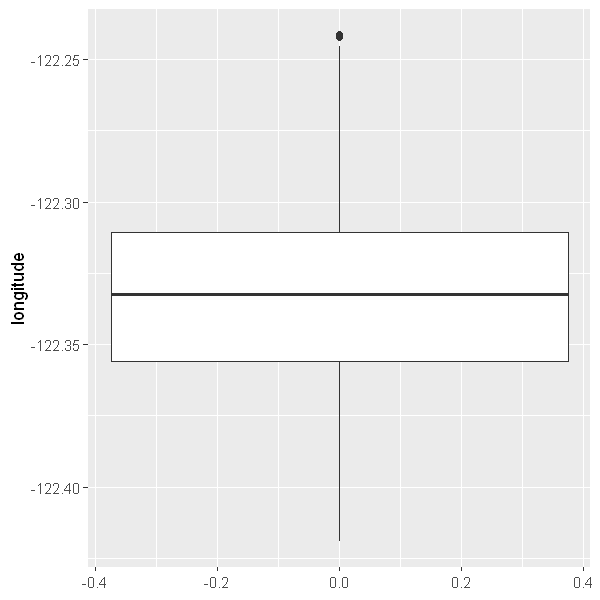

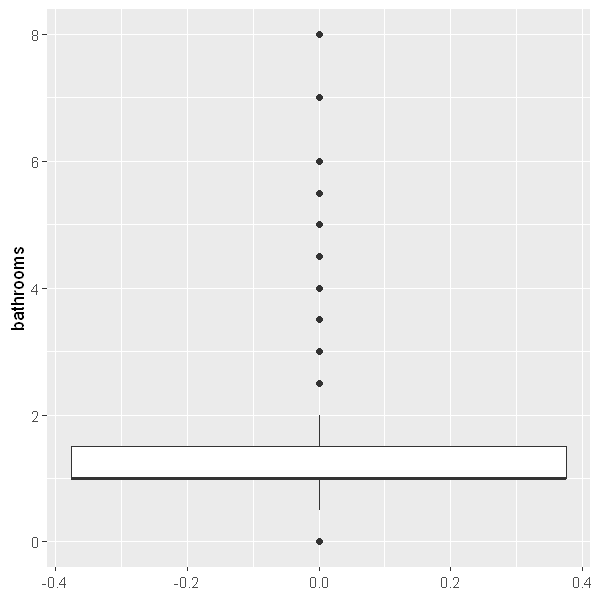

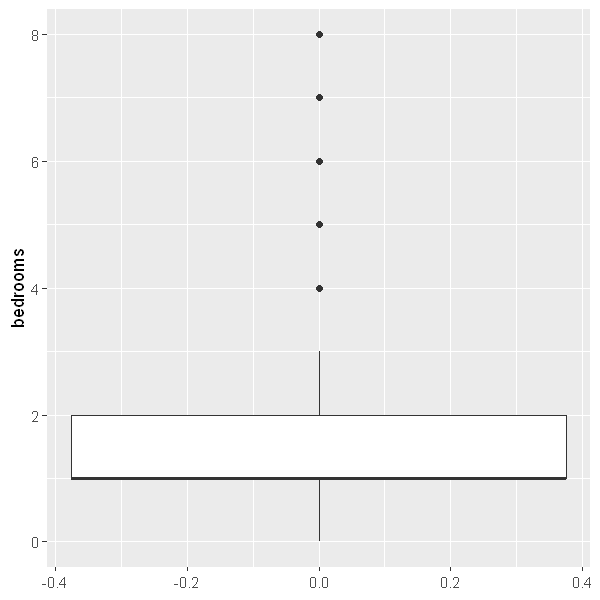

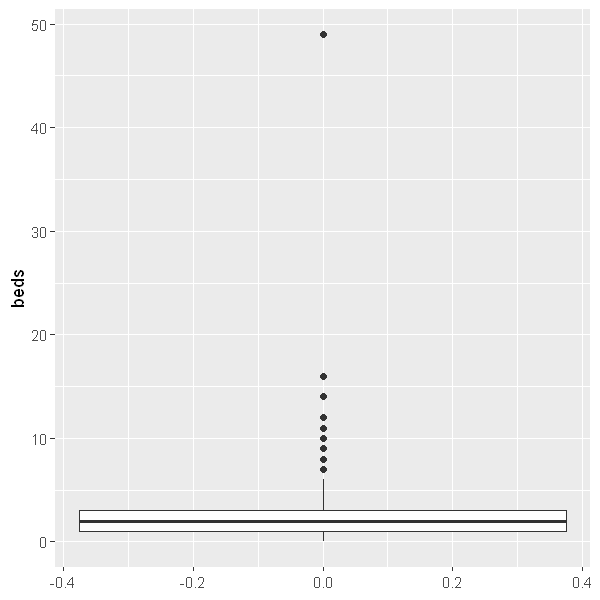

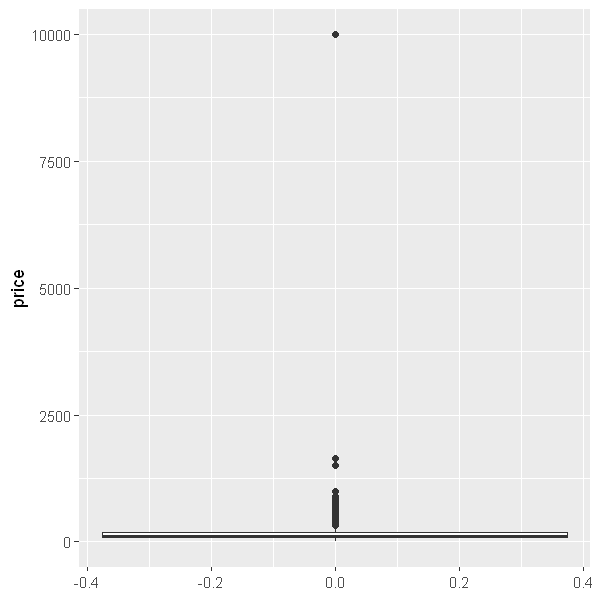

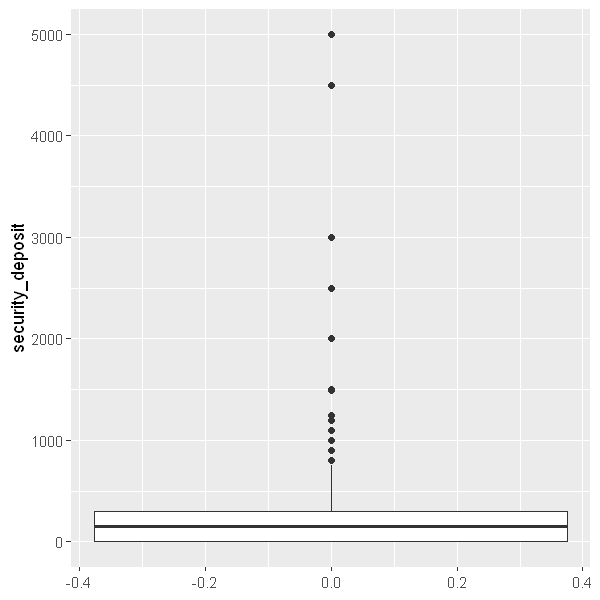

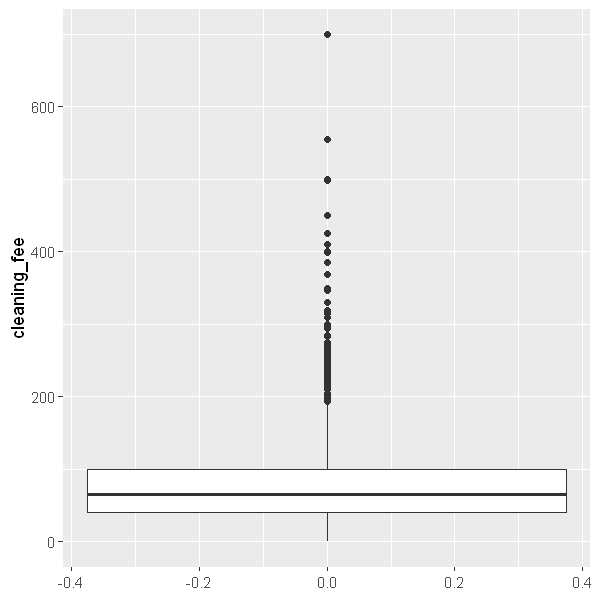

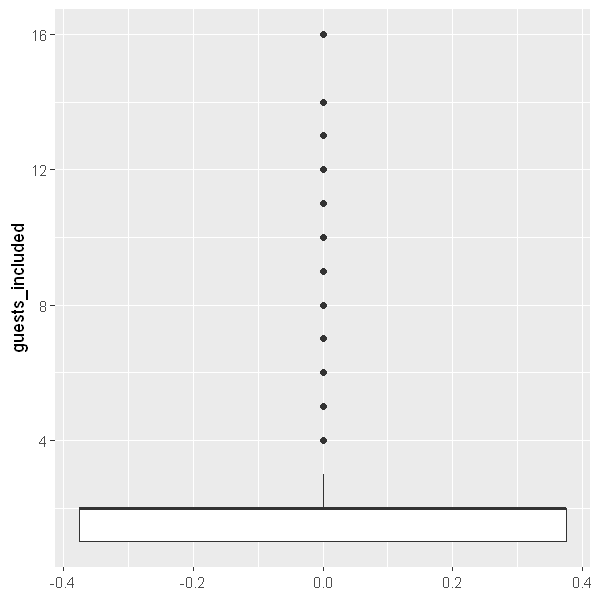

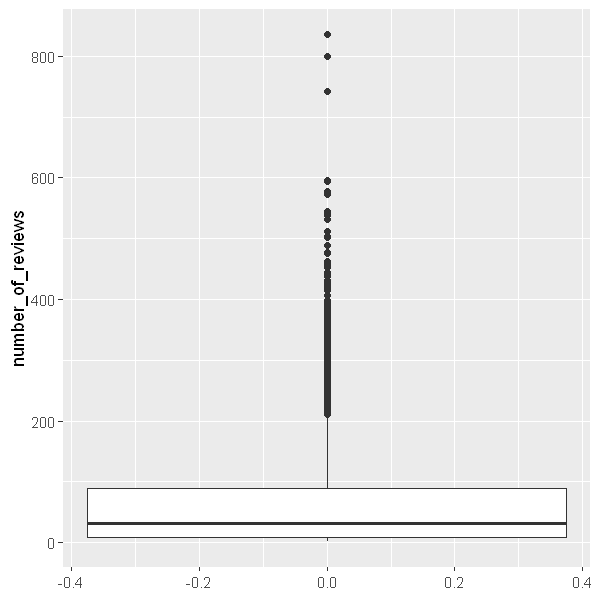

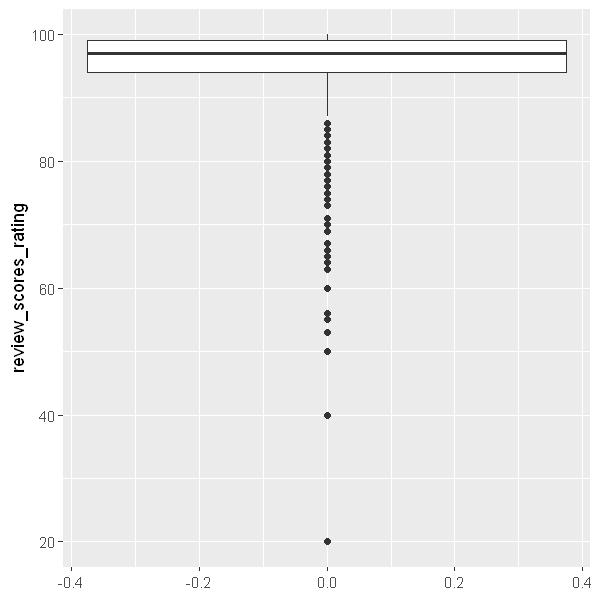

In [25]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data = data, aes(y = latitude)) + geom_boxplot()
ggplot(data = data, aes(y = longitude)) + geom_boxplot()
ggplot(data = data, aes(y = bathrooms)) + geom_boxplot()
ggplot(data = data, aes(y = bedrooms)) + geom_boxplot()
ggplot(data = data, aes(y = beds)) + geom_boxplot()
ggplot(data = data, aes(y = price)) + geom_boxplot()
ggplot(data = data, aes(y = security_deposit)) + geom_boxplot()
ggplot(data = data, aes(y = cleaning_fee)) + geom_boxplot()
ggplot(data = data, aes(y = guests_included)) + geom_boxplot()
ggplot(data = data, aes(y = number_of_reviews)) + geom_boxplot()
ggplot(data = data, aes(y = review_scores_rating)) + geom_boxplot()

In [26]:
data <- data %>% 
  filter(price < quantile(data$price, 0.99) & price > quantile(data$price, 0.01))

data <- data %>% 
  filter(security_deposit < quantile(data$security_deposit, 0.99) & security_deposit > quantile(data$security_deposit, 0.01))

data <- data %>% 
  filter(cleaning_fee < quantile(data$cleaning_fee, 0.99) & cleaning_fee > quantile(data$cleaning_fee, 0.01))

data <- data %>% 
  filter(number_of_reviews < quantile(data$number_of_reviews, 0.99) & number_of_reviews > quantile(data$number_of_reviews, 0.01))

data <- data %>% 
  filter(review_scores_rating < quantile(data$review_scores_rating, 0.99) & review_scores_rating > quantile(data$review_scores_rating, 0.01))

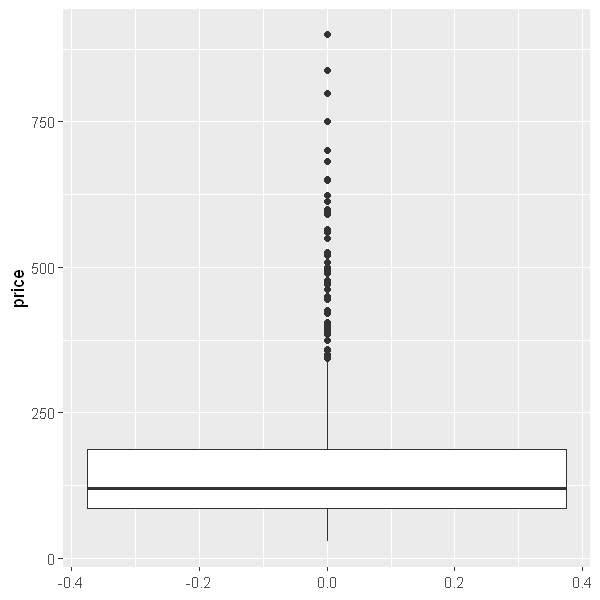

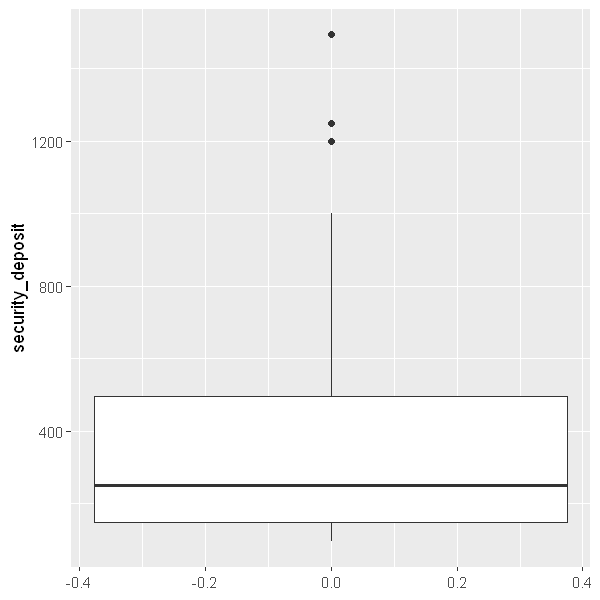

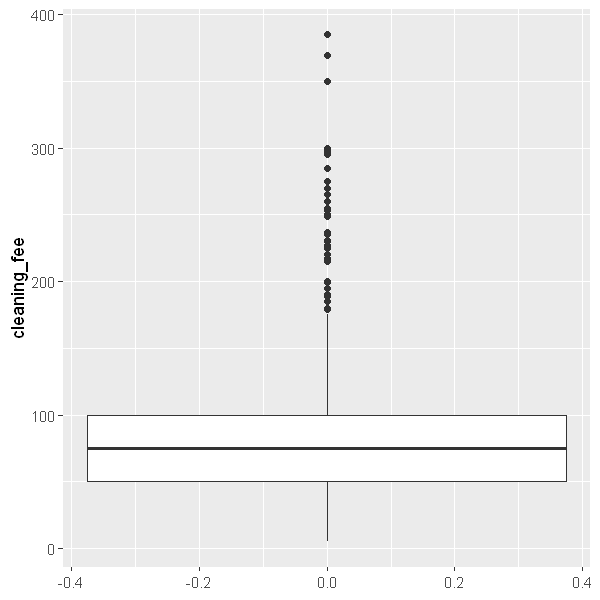

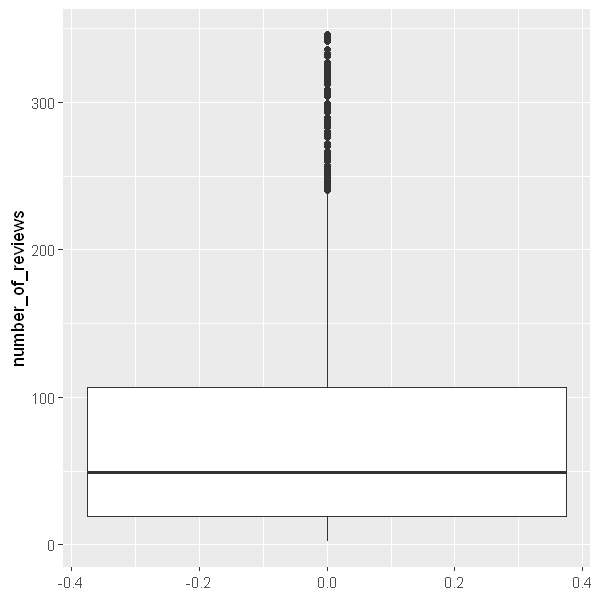

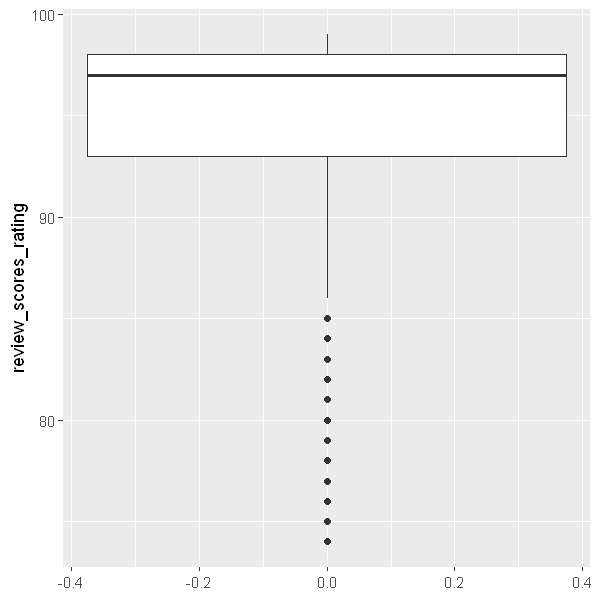

In [27]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data = data, aes(y = price)) + geom_boxplot()
ggplot(data = data, aes(y = security_deposit)) + geom_boxplot()
ggplot(data = data, aes(y = cleaning_fee)) + geom_boxplot()
ggplot(data = data, aes(y = number_of_reviews)) + geom_boxplot()
ggplot(data = data, aes(y = review_scores_rating)) + geom_boxplot()

# Assumptions of linear regression (Linear relationship + No or little multicollinearity)

Linear relationship

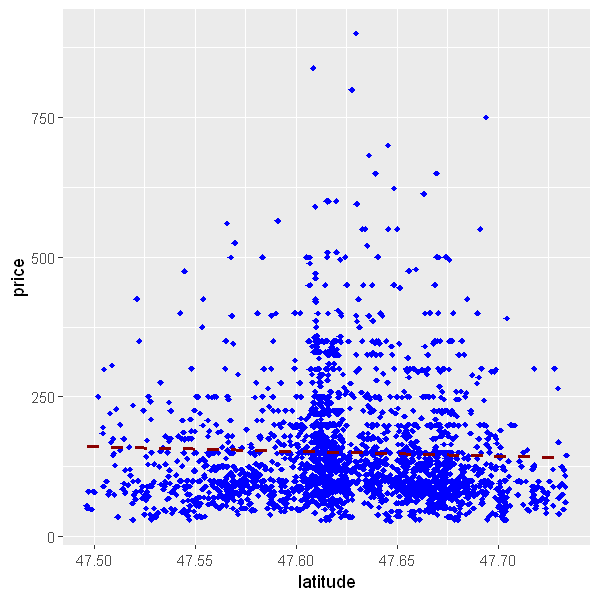

In [28]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = latitude, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

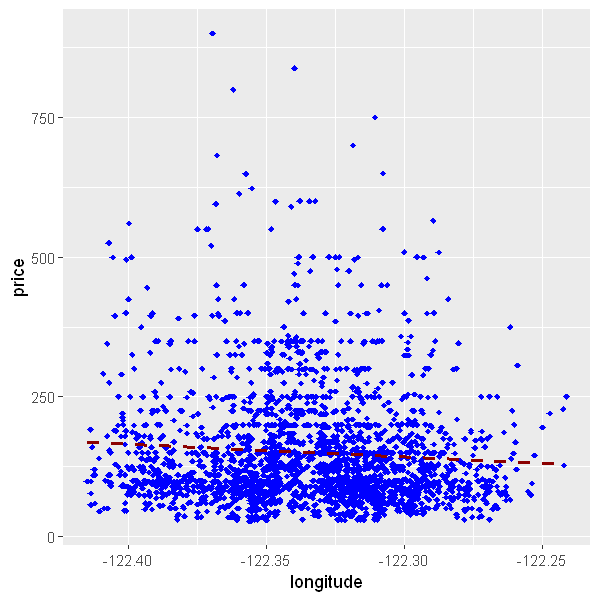

In [29]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = longitude, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

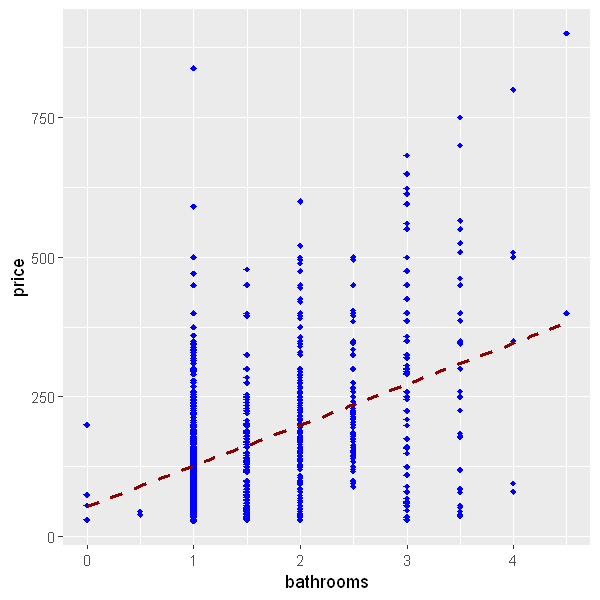

In [30]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = bathrooms, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

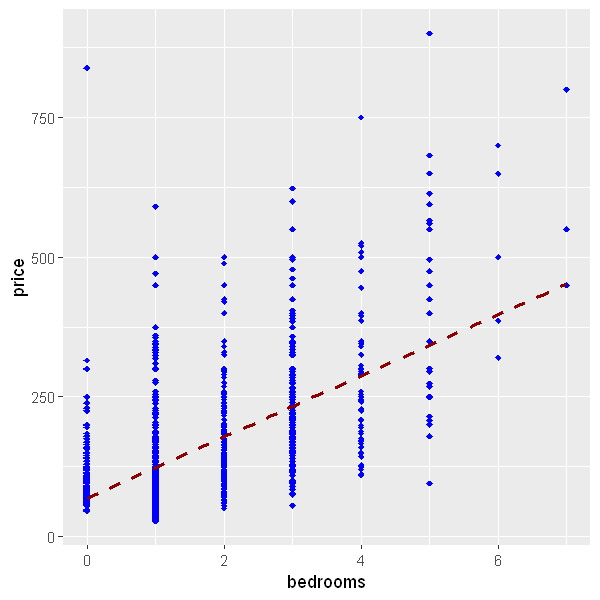

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = bedrooms, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

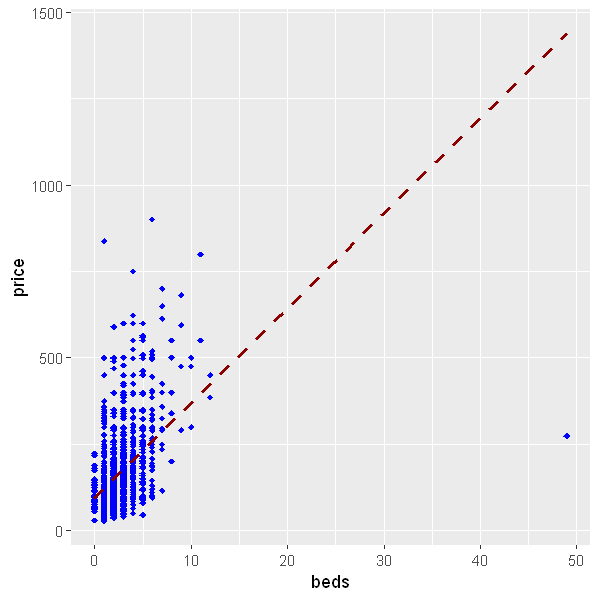

In [32]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = beds, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

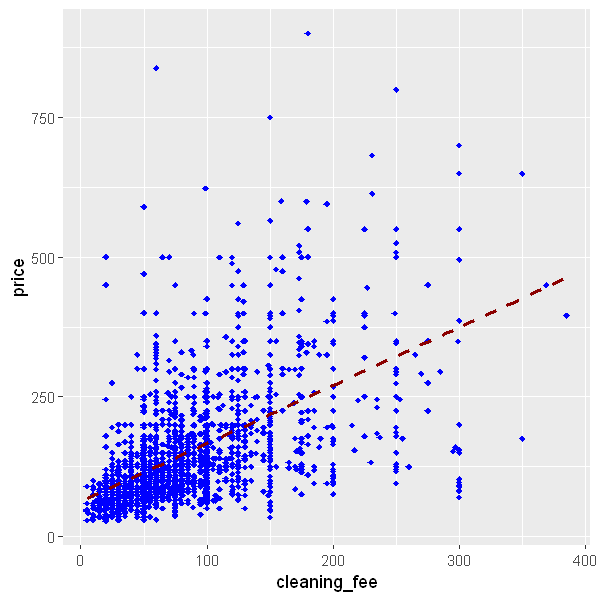

In [33]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = cleaning_fee, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

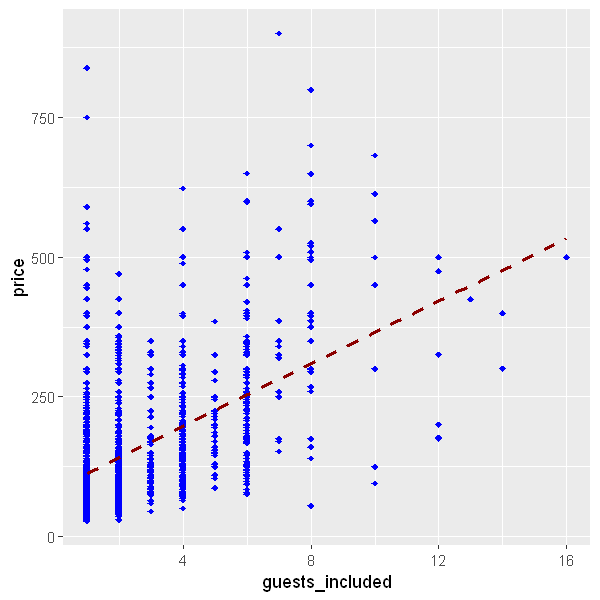

In [34]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = guests_included, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

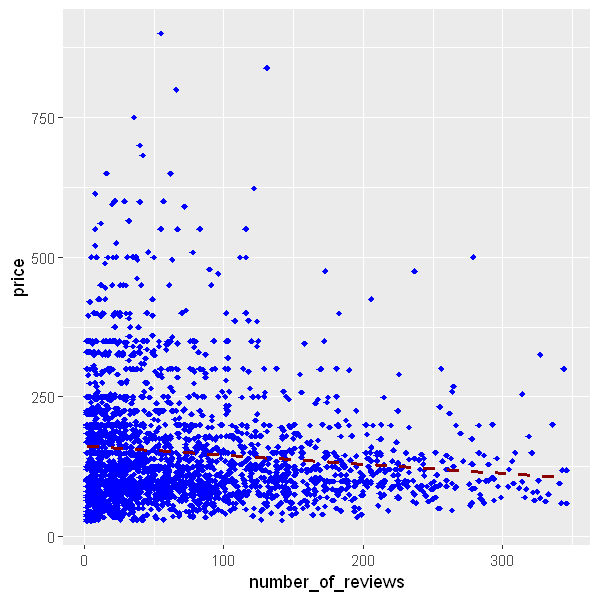

In [35]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = number_of_reviews, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

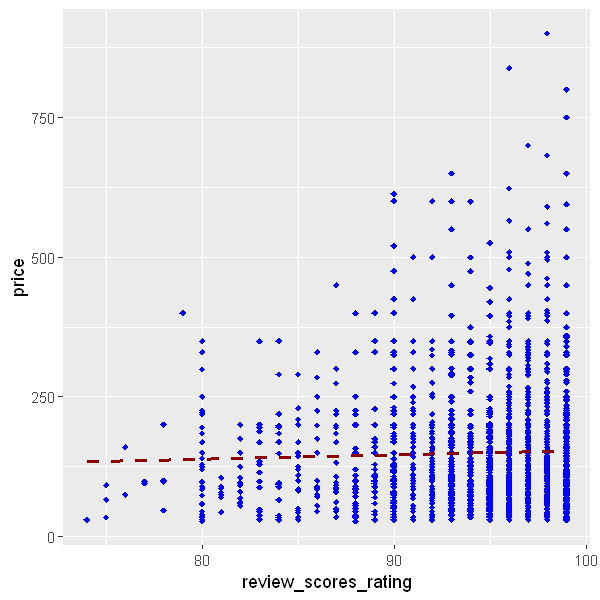

In [36]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data, aes(x = review_scores_rating, y = price)) + 
  geom_point(shape = 18, color = 'blue') +
  geom_smooth(method = lm, se = FALSE, linetype = 'dashed', color = 'darkred')

In [37]:
data <- data %>%
    select(-review_scores_rating)

No or little multicollinearity

In [38]:
X_columns <- c('latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 
               'guests_included', 'number_of_reviews')

X <- data[X_columns]

In [39]:
model_1 <- lm(latitude ~ longitude + bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_1 <- summary(model_1)$r.squared
vif_1 <- round(1 / (1 - rsq_1), 2)

model_2 <- lm(longitude ~ latitude + bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_2 <- summary(model_2)$r.squared
vif_2 <- round(1 / (1 - rsq_2), 2)

model_3 <- lm(bathrooms ~ latitude + longitude + bedrooms + beds + security_deposit + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_3 <- summary(model_3)$r.squared
vif_3 <- round(1 / (1 - rsq_3), 2)

model_4 <- lm(bedrooms ~ latitude + longitude + bathrooms + beds + security_deposit + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_4 <- summary(model_4)$r.squared
vif_4 <- round(1 / (1 - rsq_4), 2)

model_5 <- lm(beds ~ latitude + longitude + bathrooms + bedrooms + security_deposit + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_5 <- summary(model_5)$r.squared
vif_5 <- round(1 / (1 - rsq_5), 2)

model_6 <- lm(security_deposit ~ latitude + longitude + bathrooms + bedrooms + beds + cleaning_fee + guests_included +
              number_of_reviews, data = X)
rsq_6 <- summary(model_6)$r.squared
vif_6 <- round(1 / (1 - rsq_6), 2)

model_7 <- lm(cleaning_fee ~ latitude + longitude + bathrooms + bedrooms + beds + security_deposit + guests_included +
              number_of_reviews, data = X)
rsq_7 <- summary(model_7)$r.squared
vif_7 <- round(1 / (1 - rsq_7), 2)

model_8 <- lm(guests_included ~ latitude + longitude + bathrooms + bedrooms + beds + security_deposit + cleaning_fee +
              number_of_reviews, data = X)
rsq_8 <- summary(model_8)$r.squared
vif_8 <- round(1 / (1 - rsq_8), 2)

model_9 <- lm(number_of_reviews ~ latitude + longitude + bathrooms + bedrooms + beds + security_deposit + cleaning_fee +
              guests_included, data = X)
rsq_9 <- summary(model_9)$r.squared
vif_9 <- round(1 / (1 - rsq_9), 2)

In [40]:
print(vif_1)
print(vif_2)
print(vif_3)
print(vif_4)
print(vif_5)
print(vif_6)
print(vif_7)
print(vif_8)
print(vif_9)

[1] 1.04
[1] 1.04
[1] 1.66
[1] 3.11
[1] 2.02
[1] 1.26
[1] 1.92
[1] 1.65
[1] 1.06


# Data splitting

In [41]:
data_train <- data %>% sample_frac(.95) %>% filter(price > 0)
data_test  <- anti_join(data, data_train, by = 'id') %>% filter(price > 0)

nrow(data_train) + nrow(data_test) == nrow(data %>% filter(price > 0))

[1] TRUE

In [42]:
print(nrow(data_train))
print(nrow(data_test))

[1] 2323
[1] 122


# Model

In [43]:
model <- lm(log(price) ~ 
              neighbourhood_group_cleansed 
            + latitude
            + longitude 
            + property_type
            + room_type 
            + bathrooms
            + bedrooms
            + beds
            + log(security_deposit)
            + log(cleaning_fee)
            + guests_included
            + log(number_of_reviews), data = data_train)

# Summarize the results
summary(model)


Call:
lm(formula = log(price) ~ neighbourhood_group_cleansed + latitude + 
    longitude + property_type + room_type + bathrooms + bedrooms + 
    beds + log(security_deposit) + log(cleaning_fee) + guests_included + 
    log(number_of_reviews), data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43876 -0.21009  0.01497  0.20486  2.02250 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                     -1.897e+02  6.747e+01  -2.812
neighbourhood_group_cleansedBeacon Hill         -9.227e-02  7.749e-02  -1.191
neighbourhood_group_cleansedCapitol Hill         2.097e-01  5.695e-02   3.682
neighbourhood_group_cleansedCascade              3.161e-01  6.961e-02   4.541
neighbourhood_group_cleansedCentral Area         1.121e-01  6.417e-02   1.746
neighbourhood_group_cleansedDelridge            -3.684e-01  8.233e-02  -4.474
neighbourhood_group_cleansedDowntown             4.330e-01  5.432e-02 

# Assumptions of linear regression (Multivariate normality + No auto-correlation + Homoscedasticity)

Normality of errors

In [44]:
shapiro.test(model$residuals)


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.98943, p-value = 4.703e-12


In [45]:
alpha = 0.05
p.value = as.numeric(shapiro.test(model$residuals)$p.value)

print('P-value:')
print(p.value)

if (p.value > alpha) {
    print('Normal distributed errors.')
} else if (p.value < alpha) {
    print('Errors are not normally distributed.')
}

[1] "P-value:"
[1] 4.702721e-12
[1] "Errors are not normally distributed."


No auto-correlation

In [46]:
print('\nPerforming Durbin-Watson Test')
print('\n')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

durbin_watson_value = as.numeric(dwtest(model)$statistic)

print('Durbin-Watson value:')
print(durbin_watson_value)

if (durbin_watson_value < 1.5) {
    print('Signs of positive autocorrelation')
    print('Assumption not satisfied')
} else if (durbin_watson_value > 2.5) {
    print('Signs of negative autocorrelation')
    print('Assumption not satisfied')
} else
    print('Little to no autocorrelation')
    print('Assumption satisfied')

[1] "\nPerforming Durbin-Watson Test"
[1] "\n"
[1] "Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data"
[1] "0 to 2< is positive autocorrelation"
[1] ">2 to 4 is negative autocorrelation"
[1] "-------------------------------------"
[1] "Durbin-Watson value:"
[1] 1.952082
[1] "Little to no autocorrelation"
[1] "Assumption satisfied"


Homoscedasticity

Warning message:
"not plotting observations with leverage one:
  129, 1012, 1386, 2154"

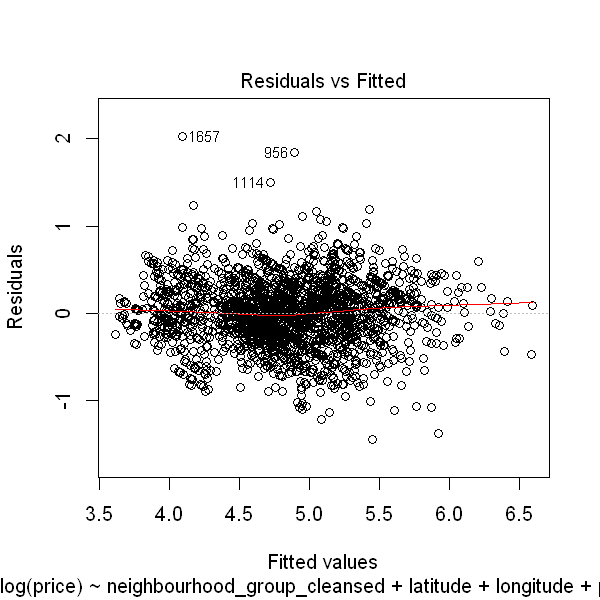

Warning message:
"not plotting observations with leverage one:
  129, 1012, 1386, 2154"

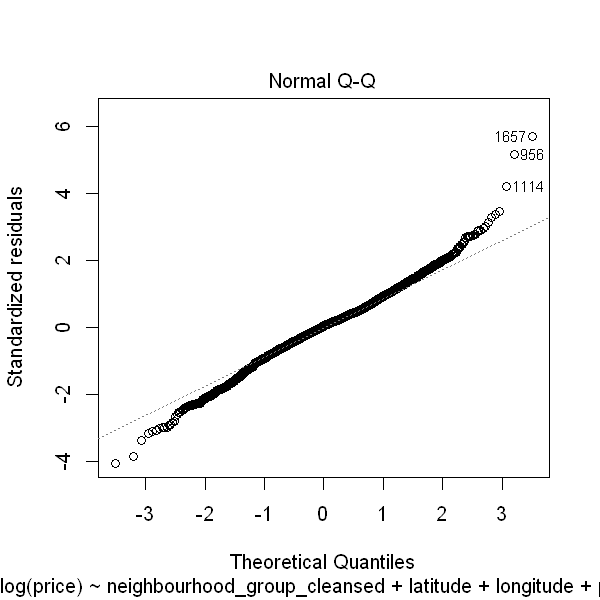

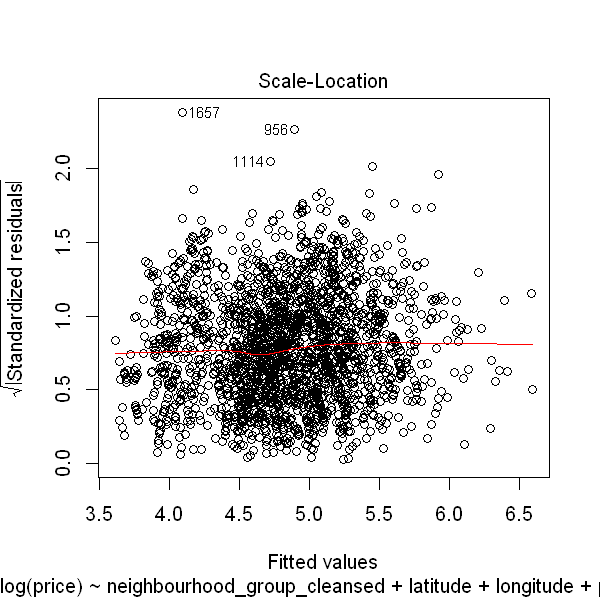

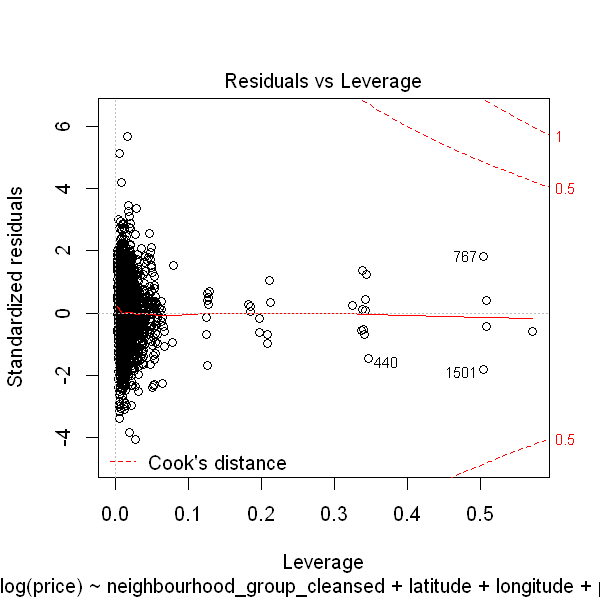

In [47]:
plot(model)

In [48]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 107.63, df = 47, p-value = 1.176e-06


In [49]:
alpha = 0.05
p.value = as.numeric(bptest(model)$p.value)

print('P-value:')
print(p.value)

if (p.value > alpha) {
    print('Errors are homoscedastic.')
} else if (p.value < alpha) {
    print('Errors are heteroscedastic.')
}

[1] "P-value:"
[1] 1.17603e-06
[1] "Errors are heteroscedastic."


# Standardized coefficients

In [50]:
standardized_model <- lm(scale(log(price)) ~ 
                         neighbourhood_group_cleansed
                         + scale(latitude)
                         + scale(longitude) 
                         + property_type
                         + room_type
                         + scale(bathrooms)
                         + scale(bedrooms)
                         + scale(beds)
                         + scale(log(security_deposit))
                         + scale(log(cleaning_fee))
                         + scale(guests_included)
                         + scale(log(number_of_reviews)), data = data_train)

# Summarize the results
summary(standardized_model)


Call:
lm(formula = scale(log(price)) ~ neighbourhood_group_cleansed + 
    scale(latitude) + scale(longitude) + property_type + room_type + 
    scale(bathrooms) + scale(bedrooms) + scale(beds) + scale(log(security_deposit)) + 
    scale(log(cleaning_fee)) + scale(guests_included) + scale(log(number_of_reviews)), 
    data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3919 -0.3493  0.0249  0.3406  3.3624 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                      0.51565    0.60349   0.854
neighbourhood_group_cleansedBeacon Hill         -0.15340    0.12883  -1.191
neighbourhood_group_cleansedCapitol Hill         0.34861    0.09468   3.682
neighbourhood_group_cleansedCascade              0.52549    0.11573   4.541
neighbourhood_group_cleansedCentral Area         0.18631    0.10669   1.746
neighbourhood_group_cleansedDelridge            -0.61241    0.13688  -4.474
neighbourhood_group

In [51]:
min(as.numeric(standardized_model$coefficients)) # room_type: Shared room
max(as.numeric(standardized_model$coefficients)) # property_type: Boutique hotel

[1] -1.934239

[1] 2.54158

# Path analysis

In [52]:
names(data_train)

[1] "id"                           "neighbourhood_group_cleansed"
 [3] "latitude"                     "longitude"                   
 [5] "property_type"                "room_type"                   
 [7] "bathrooms"                    "bedrooms"                    
 [9] "beds"                         "price"                       
[11] "security_deposit"             "cleaning_fee"                
[13] "guests_included"              "number_of_reviews"

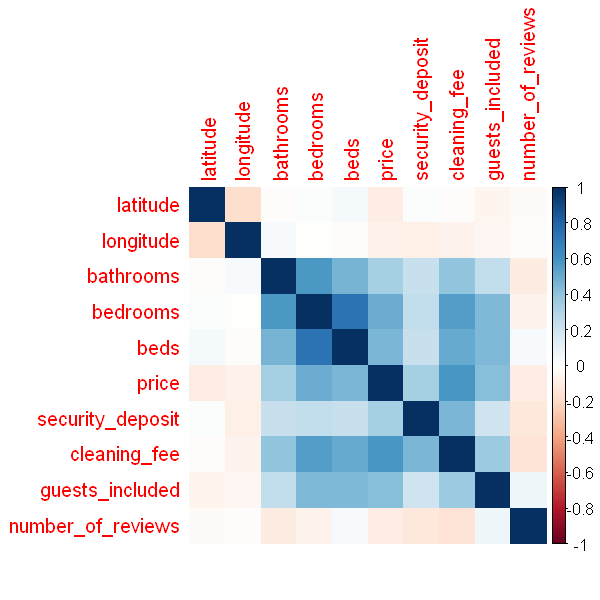

In [53]:
options(repr.plot.width = 5, repr.plot.height = 5)

data_train_numeric_columns <- data_train[, c('latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'number_of_reviews')]
data_train_numeric_columns <- data_train_numeric_columns[complete.cases(data_train_numeric_columns), ]
correlation_matrix_for_data_train <- cor(data_train_numeric_columns, method = 'spearman')
corrplot(correlation_matrix_for_data_train, method = 'color')

In [54]:
pa_model <- 'price ~ bedrooms + cleaning_fee + guests_included
cleaning_fee ~ bedrooms + beds'

In [55]:
pa_model.fit <- sem(pa_model, sample.cov = correlation_matrix_for_data_train, sample.nobs = nrow(data_train))

In [56]:
summary(pa_model.fit, standardized = T, fit = T, rsquare = T)

lavaan 0.6-6 ended normally after 13 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                          7
                                                      
  Number of observations                          2323
                                                      
Model Test User Model:
                                                      
  Test statistic                                48.130
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              2206.789
  Degrees of freedom                                 7
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.979
  Tucker-Lewis Index (TLI)                       0.927

Loglikelihood and Information Criteri

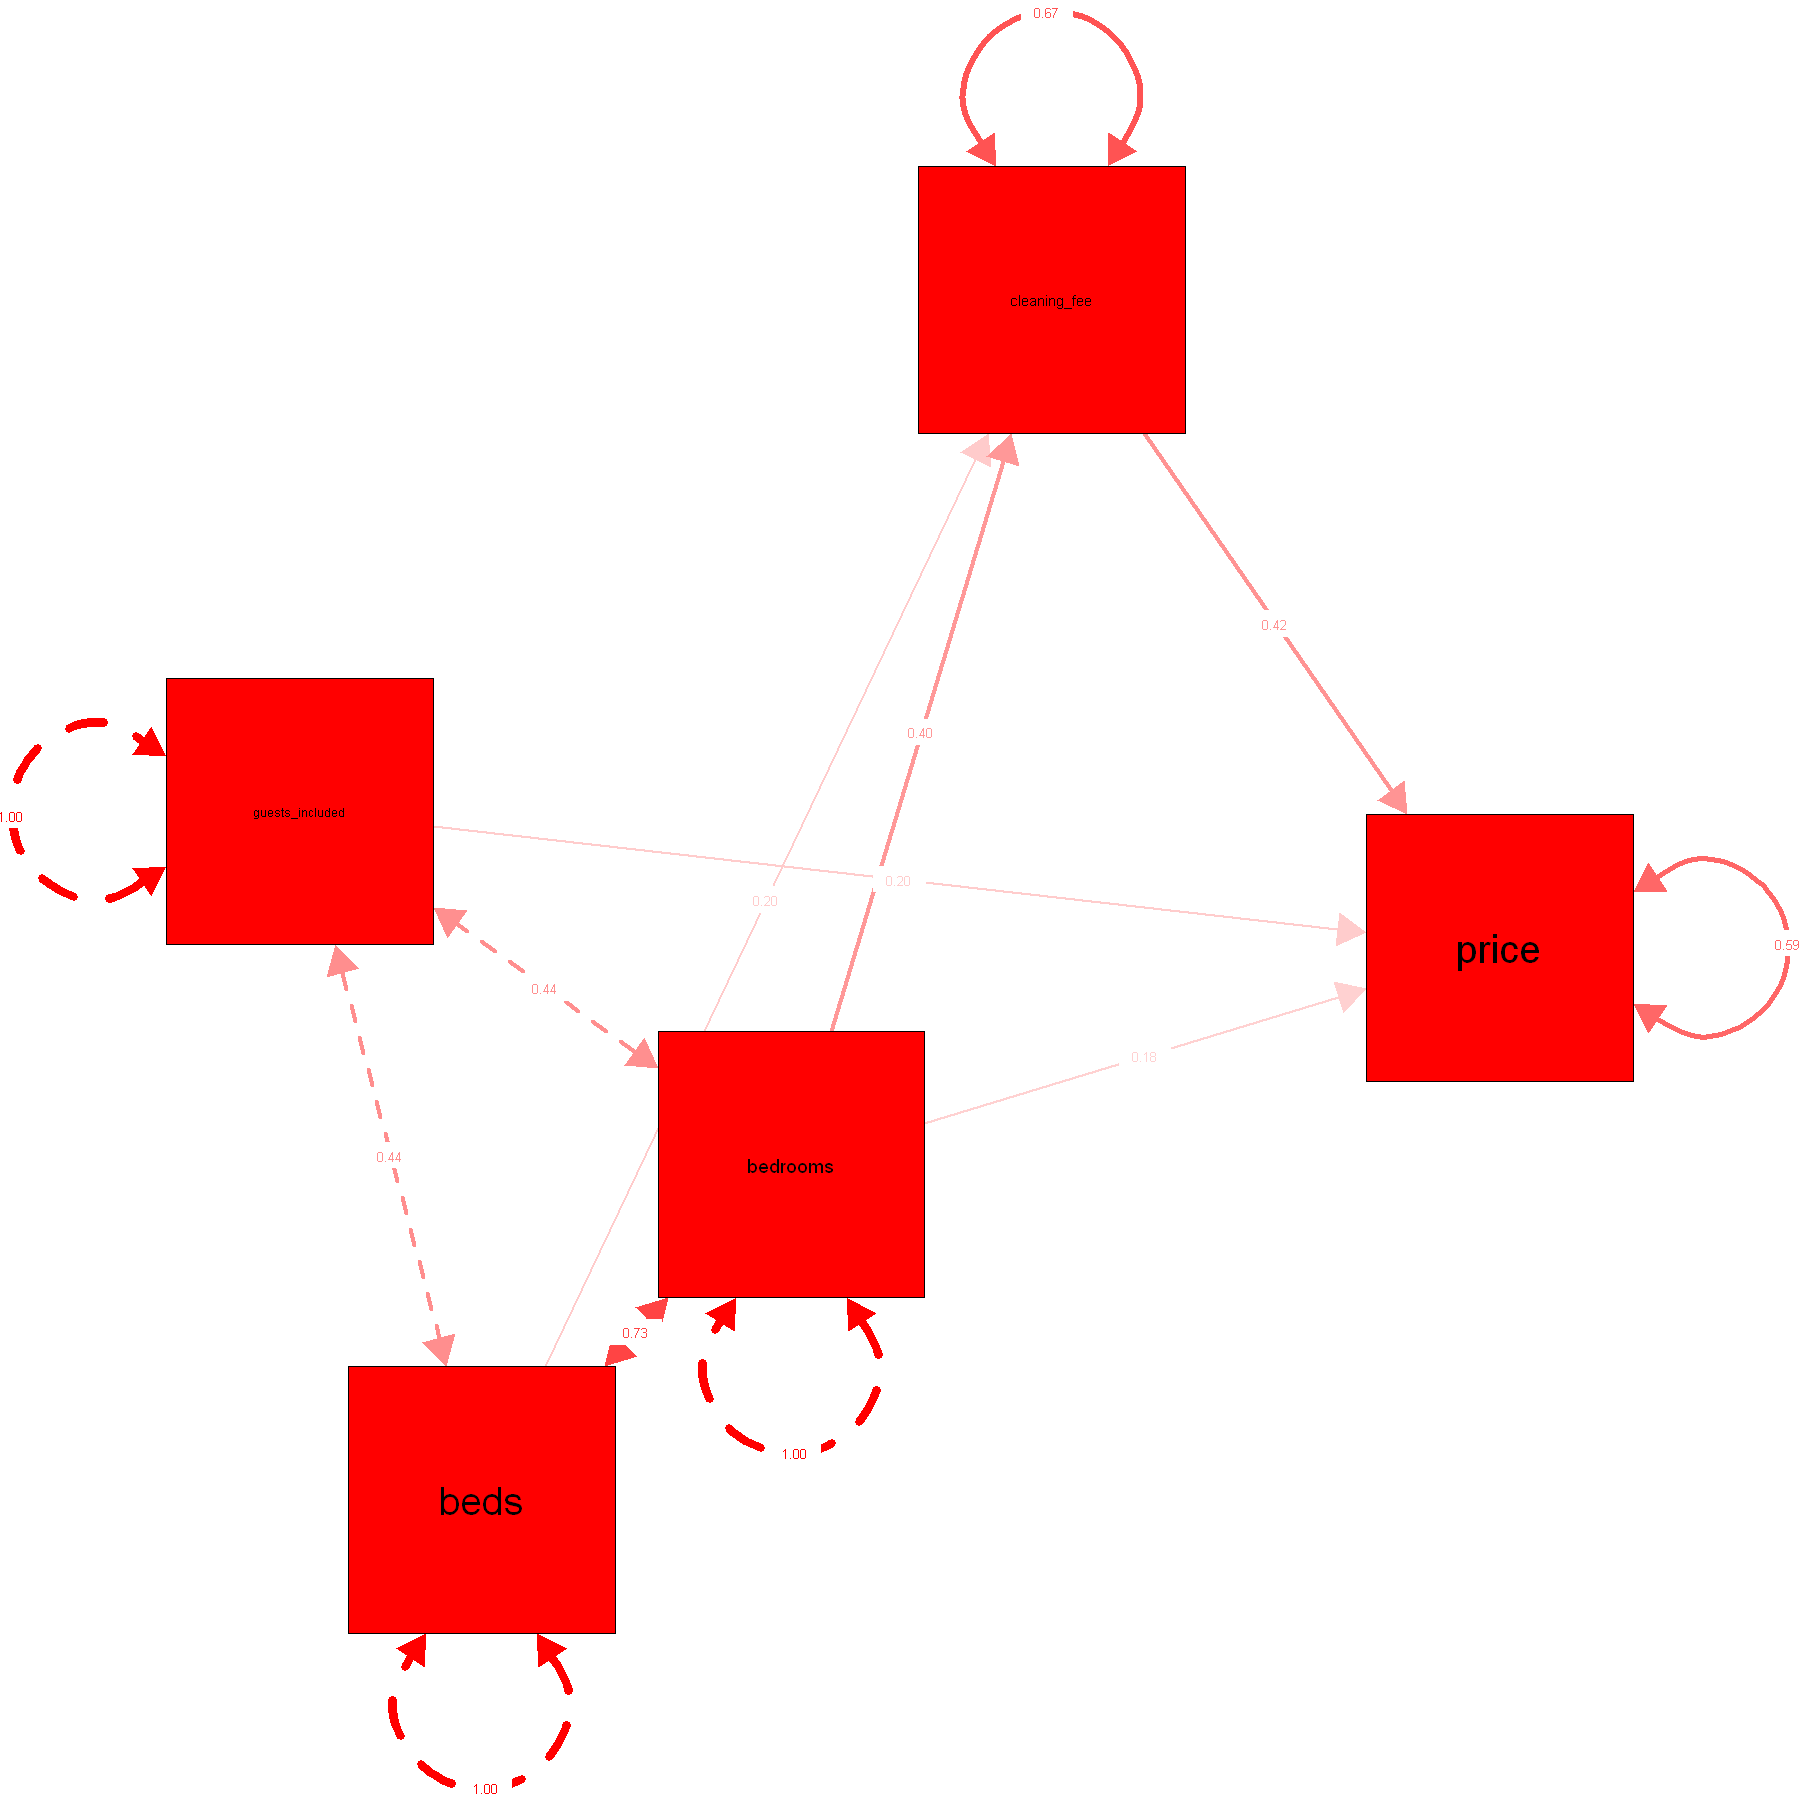

In [57]:
options(repr.plot.width = 15, repr.plot.height = 15)

semPaths(pa_model.fit, 'std', layout = 'spring', sizeLat = 14, sizeMan = 14, nCharEdges = 5, nCharNodes = 15, color = 'red', 
         edge.color = 'red', edge.label.cex = 0.7)

# Confirmatory factor analysis (CFA)

In [58]:
cfa_model <- 'rent_costs_details =~ price + security_deposit + cleaning_fee
rooms_information =~ bathrooms + bedrooms + beds'

cfa_model.fit <- cfa(cfa_model, data_train)

summary(cfa_model.fit, standardized = T, fit.measures = T, rsquare = T)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

lavaan 0.6-6 ended normally after 114 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         13
                                                      
  Number of observations                          2323
                                                      
Model Test User Model:
                                                      
  Test statistic                               144.531
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              5583.938
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.975
  Tucker-Lewis Index (TLI)                       0.954

Loglikelihood and Information Criter

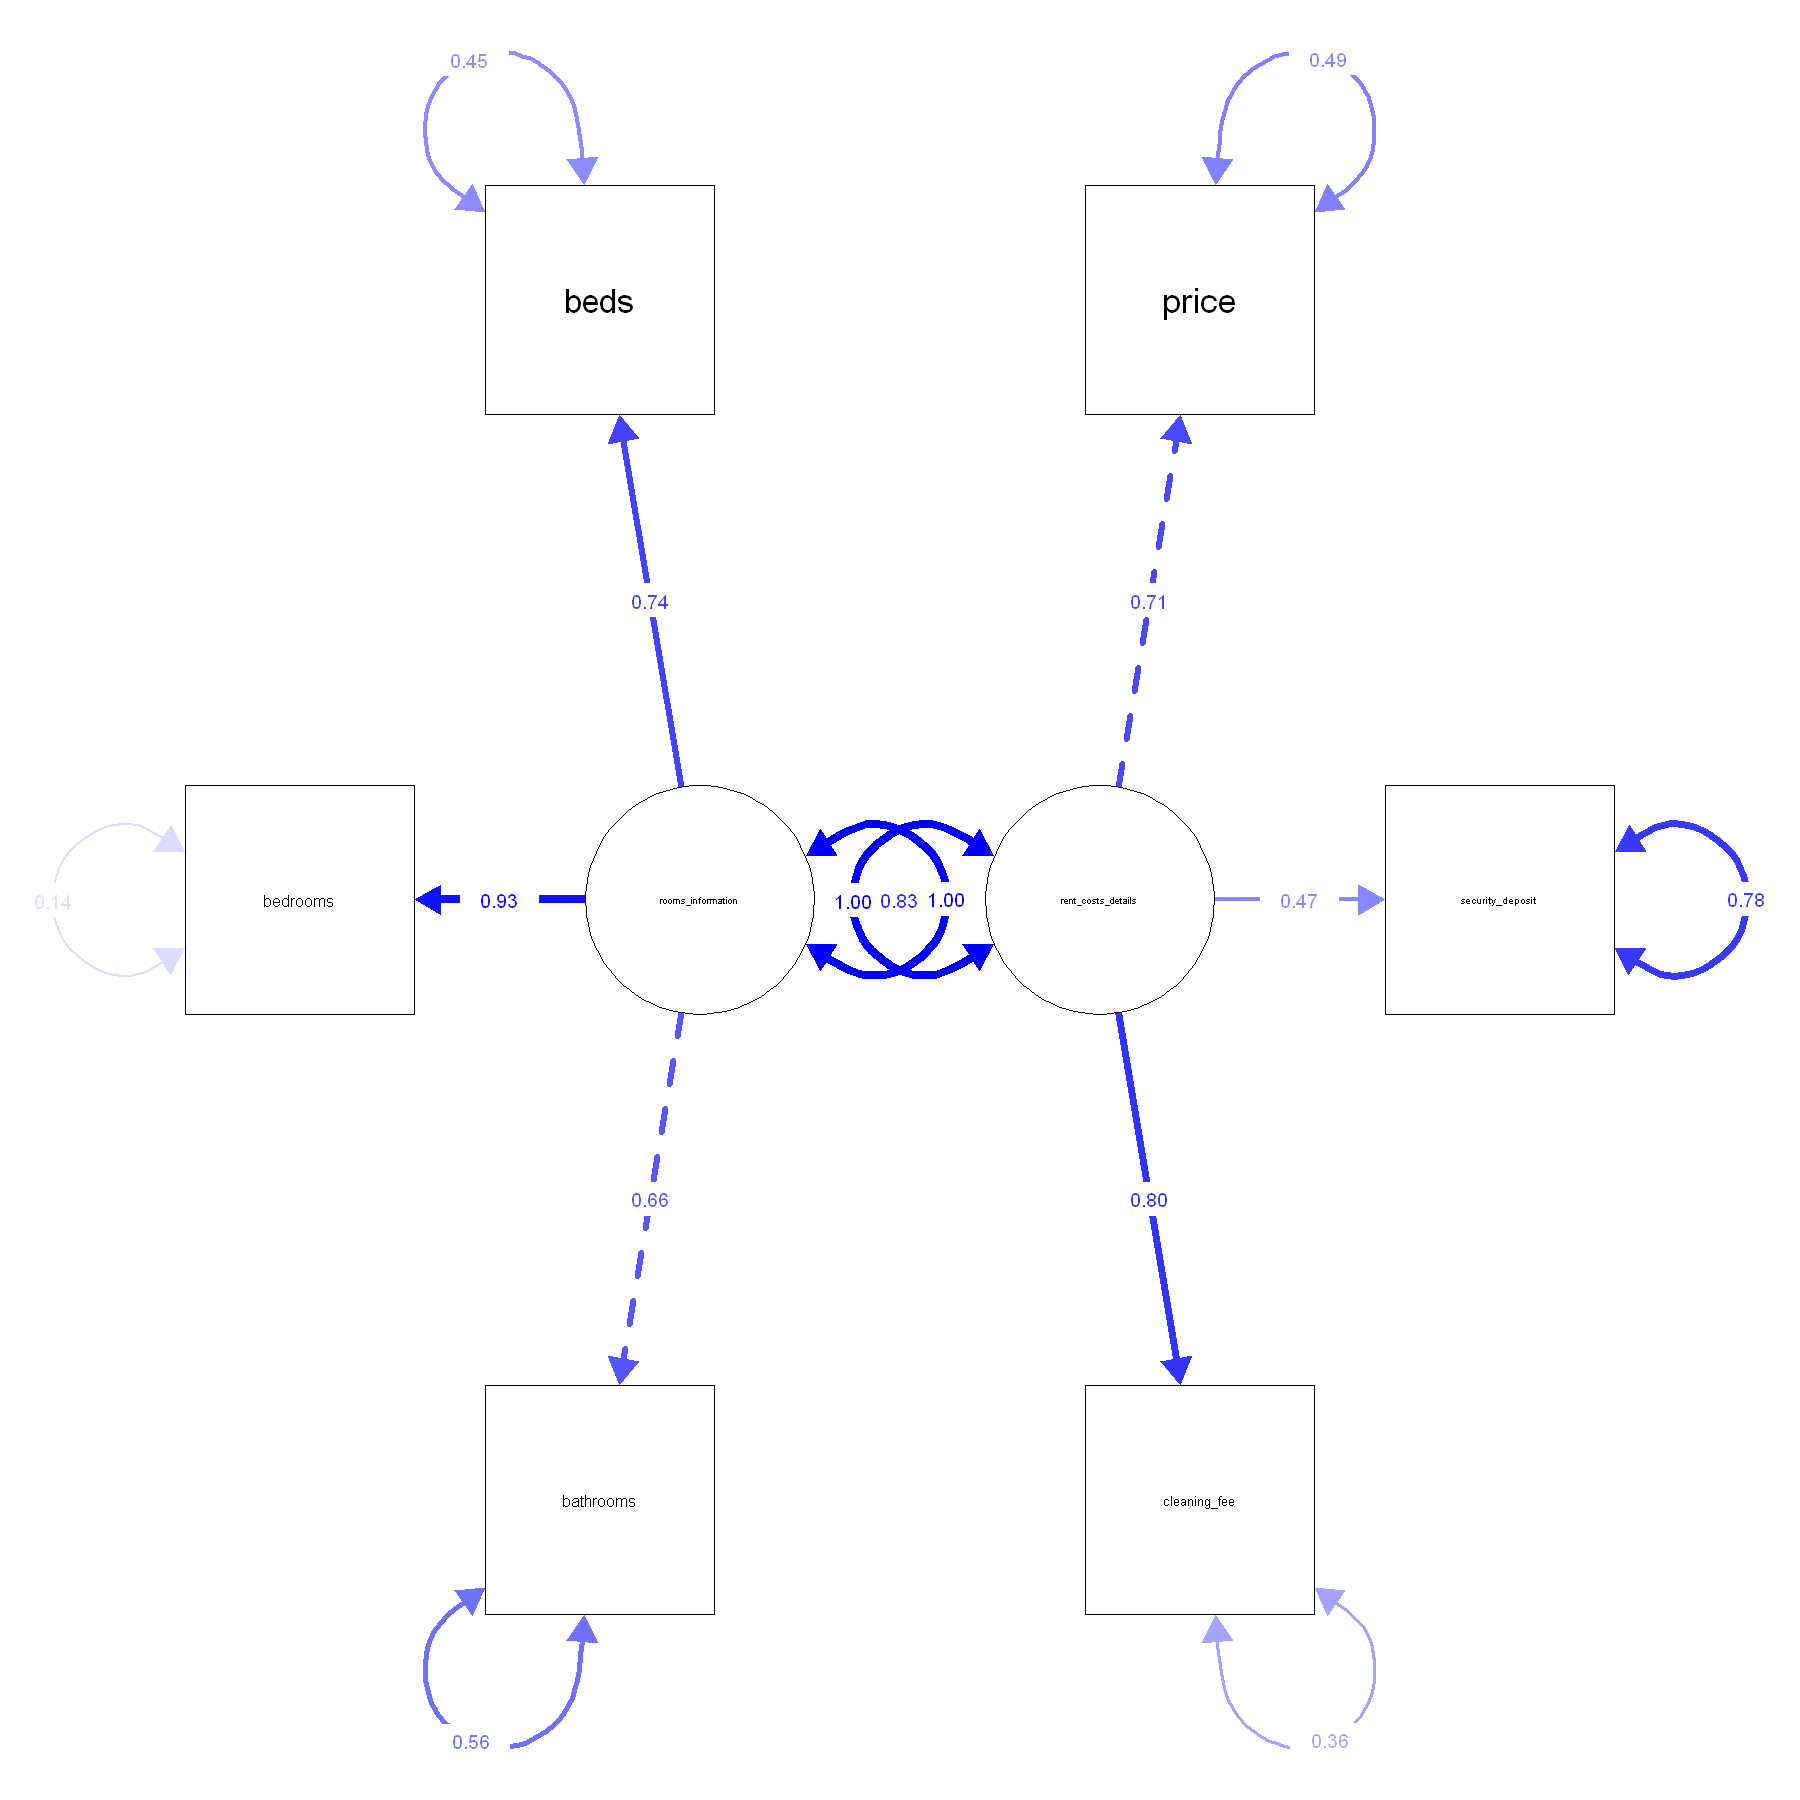

In [59]:
options(repr.plot.width = 15, repr.plot.height = 15)

semPaths(object = cfa_model.fit, whatLabels = 'std', edge.label.cex = 1, layout = 'circle', what = 'std', edge.color = 'blue', 
         rotation = 1, sizeLat = 12, sizeMan = 12, nCharEdges = 0, nCharNodes = 0)

# Model with structural equations

In [60]:
sem_model <- 'rent_costs_details =~ price + security_deposit + cleaning_fee
rooms_information =~ bathrooms + bedrooms + beds
rooms_information =~ rent_costs_details'

sem_model.fit <- cfa(sem_model, data_train)

summary(sem_model.fit, standardized = T, fit.measures = T, rsquare = T)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

lavaan 0.6-6 ended normally after 120 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         13
                                                      
  Number of observations                          2323
                                                      
Model Test User Model:
                                                      
  Test statistic                               144.531
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              5583.938
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.975
  Tucker-Lewis Index (TLI)                       0.954

Loglikelihood and Information Criter

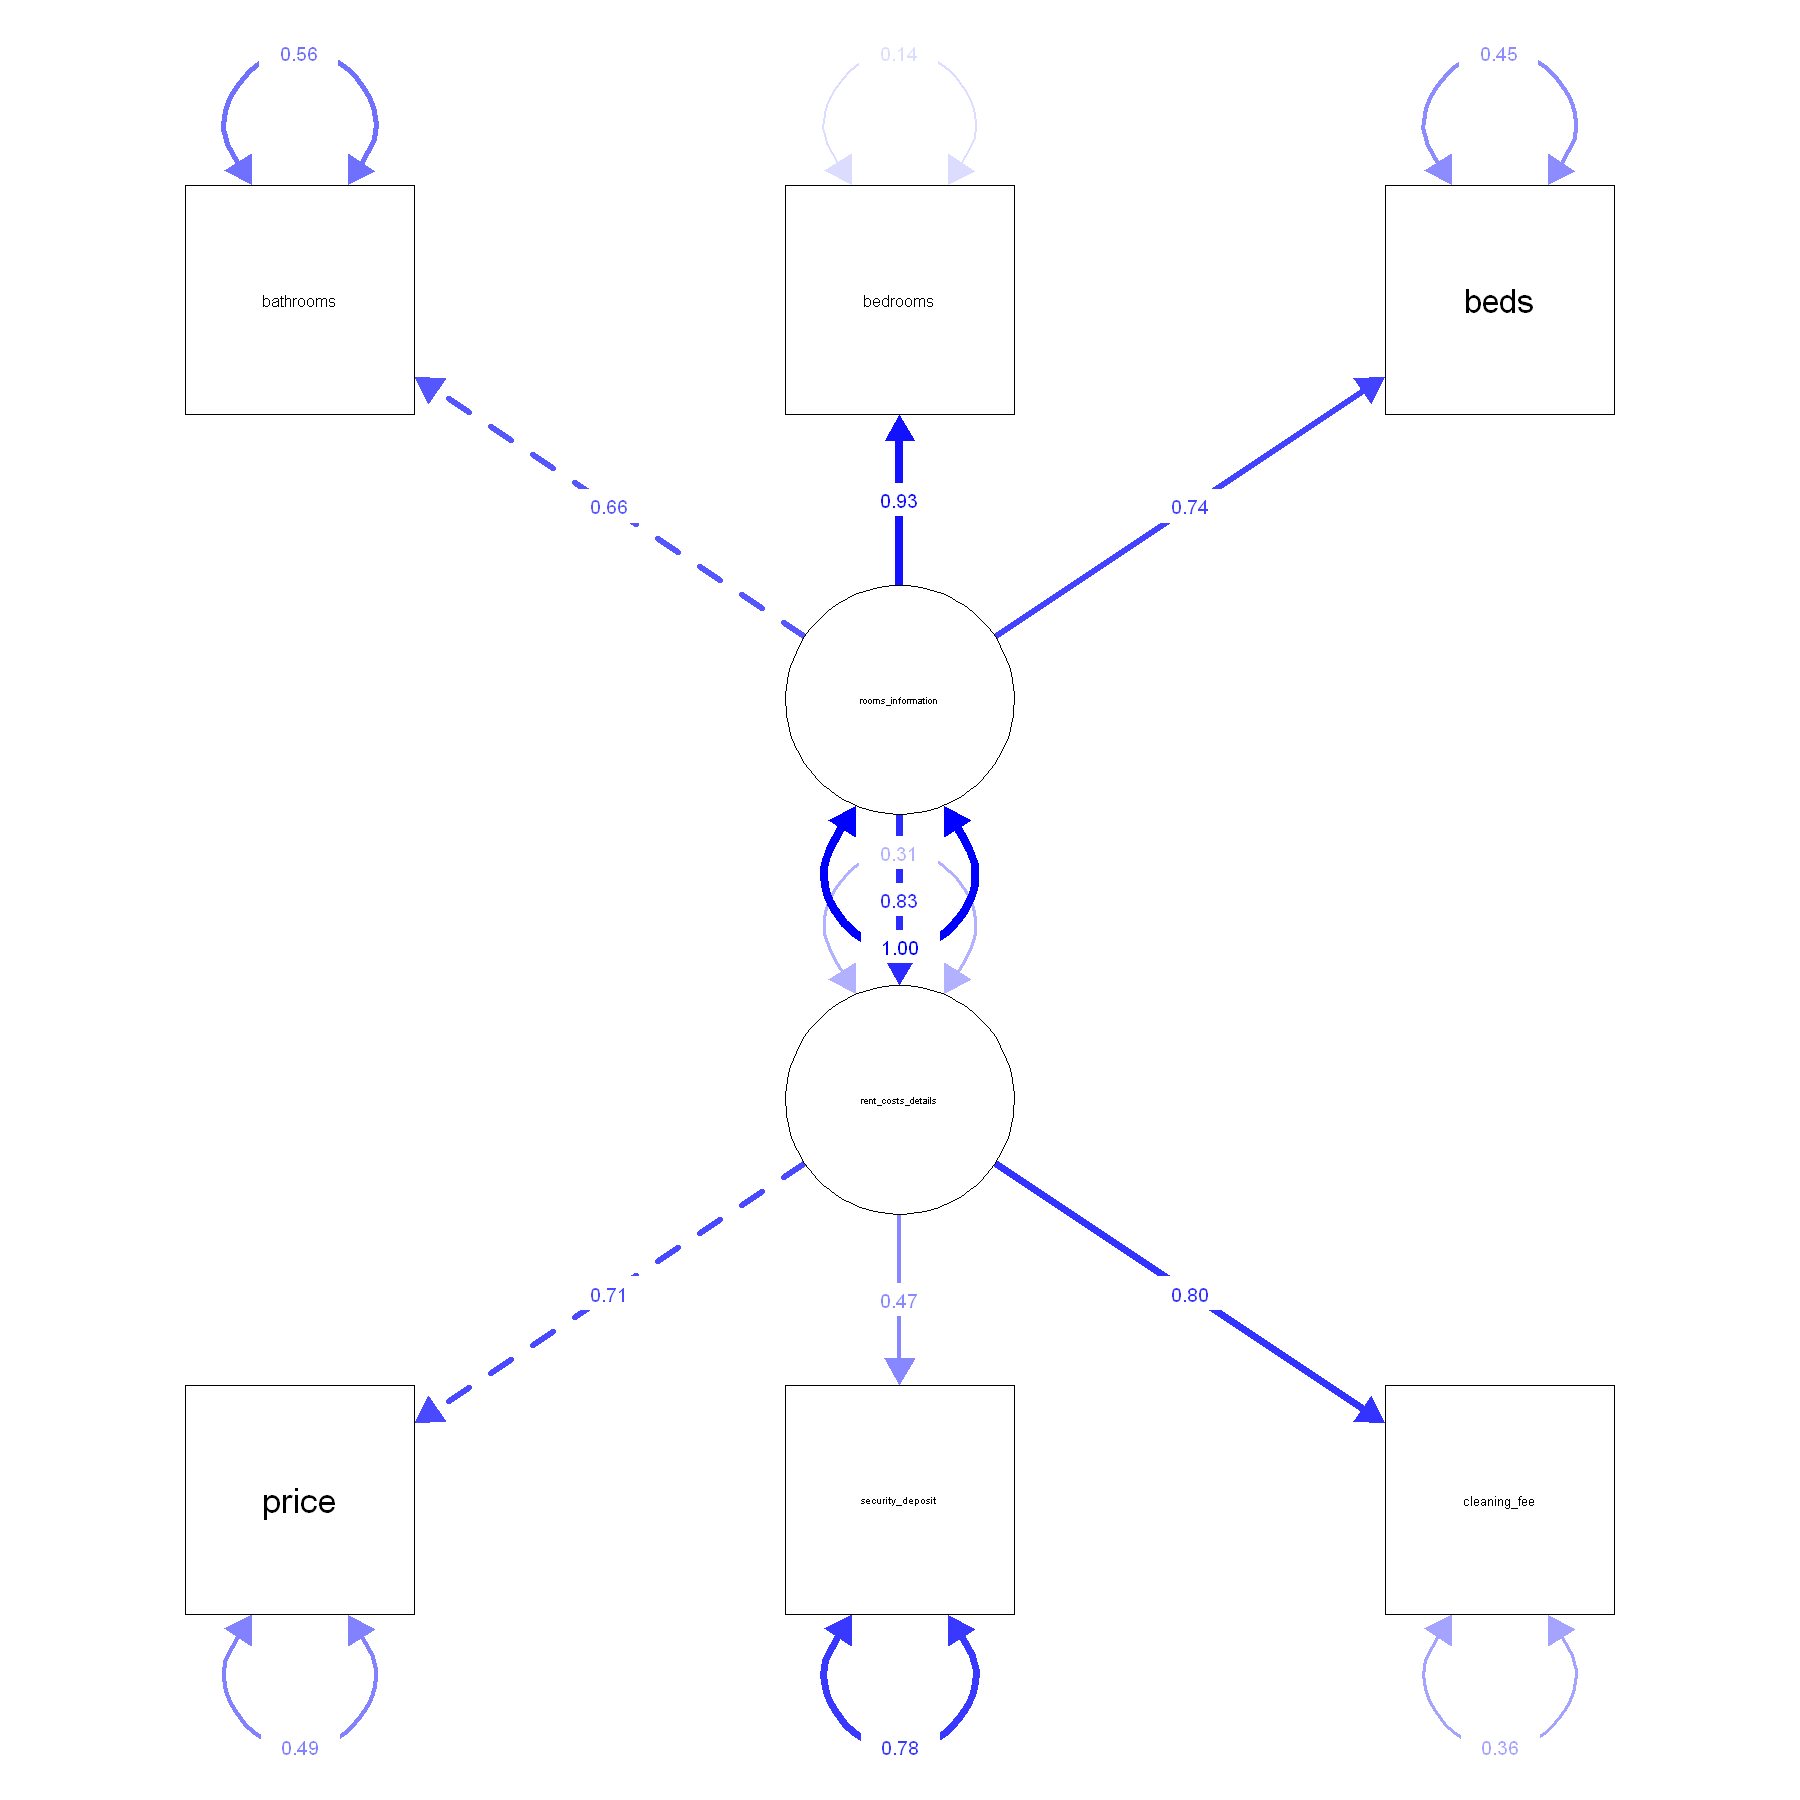

In [61]:
options(repr.plot.width = 15, repr.plot.height = 15)

semPaths(object = sem_model.fit, whatLabels = 'std', edge.label.cex = 1, layout = 'tree', what = 'std', edge.color = 'blue', 
         rotation = 1, sizeLat = 12, sizeMan = 12, nCharEdges = 0, nCharNodes = 0)

# Main conclusion

In [ ]:
# 1. Hotel rooms are most expensive. Shared rooms are very cheap.
# 2. Downtown rooms are very expensive.
# 2. 65% of the price variation is explained by the simultaneous variation of the independent variables.
# 3. All linear regression assumptions were satisfied, except the ones related to the residuals.
# 4. 'Bedrooms' variable has a high impact on the price. Also, 'room_type', 'property_type' and 'neighbourhood_group_cleansed'.
# 5. All the RMSEA values falls within the acceptance level.
# 6. We had the chance to create 2 latent variables:
# rent_costs_details =~ price + security_deposit + cleaning_fee
# rooms_information =~ bathrooms + bedrooms + beds